# PREDICCIÓN CHURN POR NODO

## CONTENIDO

* Carga de librerías
 * Configuraciones ambiente de trabajo
* 

## Pasos a seguir
* interpolación

## Carga de librerías

In [209]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt,ExponentialSmoothing
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

### Configuraciones ambiente de trabajo

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
### Carga y comparación de archivos

In [3]:
df= pd.read_csv(f'VW_TRAF_KPIS_DIA_202110190921.csv',sep='|')

In [5]:
df2= pd.read_csv(f'VW_TRAF_KPIS_DIA_202110280936.csv',sep='|')
df3_hora= pd.read_csv(f'VW_TRAF_KPIS_HORA_202110280955.csv',sep='|')
df4_dims= pd.read_csv(f'TBL_DIM_EQUIPO_T1_202110280930.csv',sep='|')

In [4]:
df.head(2)

,FEC_MEDICION,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,IP_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,VAL_DIPONIBILIDAD_MAX,VAL_DIPONIBILIDAD_PROM,VAL_LATENCIA_MAX,VAL_LATENCIA_PROM,VAL_JITTER_MAX,VAL_JITTER_PROM,VAL_PLOS_MAX,VAL_PLOS_PROM,VAL_CPU_MAX,VAL_CPU_PROM,VAL_MEM_MAX,VAL_MEM_PROM,VAL_TEMP_MAX,VAL_TEMP_PROM,VAL_LATENCIA_MAX_SONDAS,VAL_LATENCIA_PROM_SONDAS,VAL_JITTER_MAX_SONDAS,VAL_JITTER_PROM_SONDAS,VAL_PLOS_MAX_SONDAS,VAL_PLOS_PROM_SONDAS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR
0,2020-10-17 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-1_LTE_01,10.82.190.40,Aipe,Huila,100.000,100.000,104.620,65.210,0.000,6.290,1.380,0.870,16.000,13.250,31.450,16.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
1,2020-10-17 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-11_LTE_01,10.82.190.16,Aipe,Huila,100.000,100.000,78.600,67.350,0.000,6.380,0.820,0.480,16.710,12.680,31.460,16.710,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0


In [8]:
df2.head(2)

,FEC_MEDICION,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,IP_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,VAL_DIPONIBILIDAD_MAX,VAL_DIPONIBILIDAD_PROM,VAL_LATENCIA_MAX,VAL_LATENCIA_PROM,VAL_JITTER_MAX,VAL_JITTER_PROM,VAL_PLOS_MAX,VAL_PLOS_PROM,VAL_CPU_MAX,VAL_CPU_PROM,VAL_MEM_MAX,VAL_MEM_PROM,VAL_TEMP_MAX,VAL_TEMP_PROM,VAL_LATENCIA_MAX_SONDAS,VAL_LATENCIA_PROM_SONDAS,VAL_JITTER_MAX_SONDAS,VAL_JITTER_PROM_SONDAS,VAL_PLOS_MAX_SONDAS,VAL_PLOS_PROM_SONDAS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR
0,2020-10-26 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-1_LTE_01,10.82.190.40,Aipe,Huila,100.000,100.000,106.970,93.820,0.000,16.680,1.500,0.750,15.000,12.600,31.450,15.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
1,2020-10-26 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-11_LTE_01,10.82.190.16,Aipe,Huila,100.000,100.000,122.880,59.860,0.000,6.620,13.030,0.960,16.450,12.360,31.440,16.450,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0


In [11]:
df3_hora.head(2)

,FEC_MEDICION,SK_HORA_TRAFICO,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,IP_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,VAL_LATENCIA_MAX,VAL_LATENCIA_PROM,VAL_JITTER_MAX,VAL_JITTER_PROM,VAL_PLOS_MAX,VAL_PLOS_PROM,VAL_CPU_MAX,VAL_CPU_PROM,VAL_MEM_MAX,VAL_MEM_PROM,VAL_TEMP_MAX,VAL_TEMP_PROM,VAL_LATENCIA_MAX_SONDAS,VAL_LATENCIA_PROM_SONDAS,VAL_JITTER_MAX_SONDAS,VAL_JITTER_PROM_SONDAS,VAL_PLOS_MAX_SONDAS,VAL_PLOS_PROM_SONDAS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR
0,2021-09-26 00:00:00,0,LTE,CONECTIVIDAD,R7705_PZ-SF-1_LTE_01,10.82.190.40,Aipe,Huila,138.914,80.072,60.902,14.028,0.000,0.000,12.000,11.831,356454400.000,356448298.382,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
1,2021-09-26 00:00:00,0,LTE,CONECTIVIDAD,R7705_PZ-SF-11_LTE_01,10.82.190.16,Aipe,Huila,225.399,88.238,132.078,15.412,0.000,0.000,12.690,11.920,780917760.000,780917760.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0


In [15]:
df4_dims.head(2)

,SK_EQUIPO,SK_AMBITO,SK_SUBAMBITO,SK_DEMOGRAFIA,COD_EQUIPO,DES_HOSTNAME,DES_IP,DES_MARCA,DES_MODELO,DES_SERIAL,DES_TIPO,DES_ESTADO_ACTUAL,DES_ESTADO_GESTIONABLE,FEC_CARGA_DWH,FEC_ACTUALIZACION_DWH
0,297,-1,22,179,AP345_CMP-TIBU-CMTO-D_01,AP345_CMP-TIBU-CMTO-D_01,10.194.100.187,ARUBA,345,CNHDK514YB,WIRELESS CONTROLLER,OK,NaN,2021-05-25 23:00:54,2021-05-25 23:00:54
1,298,-1,22,179,AP345_CMP-TIBU-CMTO-D_02,AP345_CMP-TIBU-CMTO-D_02,10.194.100.188,ARUBA,345,CNHDK514XR,WIRELESS CONTROLLER,OK,NaN,2021-05-25 23:00:54,2021-05-25 23:00:54


In [5]:
len(df)

821191

In [6]:
#numero filas
print(len(df))
print(len(df2))
print(len(df3_hora))
print(len(df4_dims))

821191
826531
2688941
7409


In [7]:
#número columnas
print(len(df.columns))
print(len(df2.columns))
print(len(df3_hora.columns))
print(len(df4_dims.columns))

33
33
32
15


In [10]:
#diferencia df y df2
print(df['FEC_MEDICION'].max(),df['FEC_MEDICION'].min())
print(df2['FEC_MEDICION'].max(),df2['FEC_MEDICION'].min())
# fecha, mismas columnas

2021-10-17 00:00:00 2020-10-17 00:00:00
2021-10-26 00:00:00 2020-10-26 00:00:00


In [13]:
#diferencia df3_hora
print(df3_hora['FEC_MEDICION'].max(),df3_hora['FEC_MEDICION'].min())

2021-10-27 00:00:00 2021-09-26 00:00:00


In [14]:
col_df3=df3_hora.columns.values
col_df2=df2.columns.values
list_difference = [item for item in col_df3 if item not in col_df2]
print(list_difference)
list_difference = [item for item in col_df2 if item not in col_df3]
print(list_difference)

['SK_HORA_TRAFICO']
['VAL_DIPONIBILIDAD_MAX', 'VAL_DIPONIBILIDAD_PROM']


In [17]:
#cruce dimensiones
df4_dims[['COD_EQUIPO','DES_IP','DES_MARCA','DES_MODELO','DES_SERIAL']].head(5)

,COD_EQUIPO,DES_IP,DES_MARCA,DES_MODELO,DES_SERIAL
0,AP345_CMP-TIBU-CMTO-D_01,10.194.100.187,ARUBA,345,CNHDK514YB
1,AP345_CMP-TIBU-CMTO-D_02,10.194.100.188,ARUBA,345,CNHDK514XR
2,AP345_CMP-TIBU-CMTO-D_03,10.194.100.189,ARUBA,345,CNHDK514XK
3,AP345_CMP-TIBU-CMTO-E_01,10.194.100.190,ARUBA,345,CNHDK514ZW
4,AP345_CMP-TIBU-COMMAND-CENTER_01,10.194.99.227,ARUBA,345,CNHDK514SZ


In [30]:
df4_dims['COD_EQUIPO'].value_counts()[0:4]

 R829_DINA-DT-POZ-164_LTE_01                   2
AP1602_REFICAR-CTG-EDF-ADM-GETSEMANI-P02_01    2
PTP_KZ-OPR_EDF-LOAD-MASTE                      2
CD-SVD-GRB-SG-PERFORACION                      1
Name: COD_EQUIPO, dtype: int64

In [31]:
df4_dims=df4_dims.drop_duplicates(subset=['COD_EQUIPO'],keep='first')

In [21]:
df4_dims[df4_dims['COD_EQUIPO']=='AP1602_REFICAR-CTG-EDF-ADM-GETSEMANI-P02_01']

,SK_EQUIPO,SK_AMBITO,SK_SUBAMBITO,SK_DEMOGRAFIA,COD_EQUIPO,DES_HOSTNAME,DES_IP,DES_MARCA,DES_MODELO,DES_SERIAL,DES_TIPO,DES_ESTADO_ACTUAL,DES_ESTADO_GESTIONABLE,FEC_CARGA_DWH,FEC_ACTUALIZACION_DWH
6370,2905265,250,-1,563,AP1602_REFICAR-CTG-EDF-ADM-GETSEMANI-P02_01,NaN,10.233.4.44,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-28 09:27:28,2021-07-28 09:27:28
6371,2905266,252,-1,563,AP1602_REFICAR-CTG-EDF-ADM-GETSEMANI-P02_01,NaN,10.233.4.44,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-28 09:27:28,2021-07-28 09:27:28


In [32]:
df4_dims['COD_EQUIPO'].value_counts()[0:4]

BOGEVANGIPS02P                    1
UPS_SMARTIN-P35_01                1
PTP_POZ-PAUTO-SUR-B1_C-916        1
AP374_CPF-FLNA-SLUG-CATCHER_01    1
Name: COD_EQUIPO, dtype: int64

In [71]:
df4_dims.columns

Index(['SK_EQUIPO', 'SK_AMBITO', 'SK_SUBAMBITO', 'SK_DEMOGRAFIA', 'COD_EQUIPO',
       'DES_HOSTNAME', 'DES_IP', 'DES_MARCA', 'DES_MODELO', 'DES_SERIAL',
       'DES_TIPO', 'DES_ESTADO_ACTUAL', 'DES_ESTADO_GESTIONABLE',
       'FEC_CARGA_DWH', 'FEC_ACTUALIZACION_DWH'],
      dtype='object')

In [ ]:
## Fin carga y comparación de archivos

In [ ]:
# validar datos repetidos

In [47]:
df[df['COD_EQUIPO']=='G4232_POLI-HOSP_03'].tail(5)

,FEC_MEDICION,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,IP_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,VAL_DIPONIBILIDAD_MAX,VAL_DIPONIBILIDAD_PROM,VAL_LATENCIA_MAX,VAL_LATENCIA_PROM,VAL_JITTER_MAX,VAL_JITTER_PROM,VAL_PLOS_MAX,VAL_PLOS_PROM,VAL_CPU_MAX,VAL_CPU_PROM,VAL_MEM_MAX,VAL_MEM_PROM,VAL_TEMP_MAX,VAL_TEMP_PROM,VAL_LATENCIA_MAX_SONDAS,VAL_LATENCIA_PROM_SONDAS,VAL_JITTER_MAX_SONDAS,VAL_JITTER_PROM_SONDAS,VAL_PLOS_MAX_SONDAS,VAL_PLOS_PROM_SONDAS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR
810575,2021-10-14 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,76.960,76.960,26.850,3.618,14.550,0.530,6.067,0.035,4.000,0.687,35164513.450,6643444.834,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
814120,2021-10-15 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
817656,2021-10-16 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
821190,2021-10-17 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0


In [48]:
df2[df2['COD_EQUIPO']=='G4232_POLI-HOSP_03'].tail(5)

,FEC_MEDICION,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,IP_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,VAL_DIPONIBILIDAD_MAX,VAL_DIPONIBILIDAD_PROM,VAL_LATENCIA_MAX,VAL_LATENCIA_PROM,VAL_JITTER_MAX,VAL_JITTER_PROM,VAL_PLOS_MAX,VAL_PLOS_PROM,VAL_CPU_MAX,VAL_CPU_PROM,VAL_MEM_MAX,VAL_MEM_PROM,VAL_TEMP_MAX,VAL_TEMP_PROM,VAL_LATENCIA_MAX_SONDAS,VAL_LATENCIA_PROM_SONDAS,VAL_JITTER_MAX_SONDAS,VAL_JITTER_PROM_SONDAS,VAL_PLOS_MAX_SONDAS,VAL_PLOS_PROM_SONDAS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR
784478,2021-10-14 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,76.960,76.960,26.850,3.618,14.550,0.530,6.067,0.035,4.000,0.687,35164513.450,6643444.834,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
788023,2021-10-15 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
791559,2021-10-16 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
795093,2021-10-17 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
798623,2021-10-18 00:00:00,COMUNICACIONES UNIFICADAS,C.UNIFICADAS,G4232_POLI-HOSP_03,10.149.13.5,Barrancabermeja,Santander,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0


In [50]:
len(df2[df2['FEC_MEDICION']>='2021-09-10'])

168414

In [63]:
df2[df2['FEC_MEDICION']=='2021-09-09 00:00:00'].sum()

FEC_MEDICION                              2021-09-09 00:00:002021-09-09 00:00:002021-09-...
DES_AMBITO                                LTELTELTELTELTELTELTELTELTELTELTELTELTELTELTEL...
DES_SUBAMBITO                             CONECTIVIDADCONECTIVIDADCONECTIVIDADCONECTIVID...
COD_EQUIPO                                R7705_PZ-SF-1_LTE_01R7705_PZ-SF-11_LTE_01R7705...
IP_EQUIPO                                 10.82.190.4010.82.190.1610.82.190.4210.82.190....
DES_MUNICIPIO                             AipeAipeAipeAipeAipeAipeAipeAipeAipeAipeAipeAi...
DES_DEPARTEMENTO                          HuilaHuilaHuilaHuilaHuilaHuilaHuilaHuilaHuilaH...
VAL_DIPONIBILIDAD_MAX                                                            377423.390
VAL_DIPONIBILIDAD_PROM                                                           377423.390
VAL_LATENCIA_MAX                                                                2394751.168
VAL_LATENCIA_PROM                                                               

In [57]:
len(df[df['FEC_MEDICION']=='2021-09-10 00:00:00'])

4050

In [62]:
df[df['FEC_MEDICION']=='2021-09-09 00:00:00'].sum()

FEC_MEDICION                              2021-09-09 00:00:002021-09-09 00:00:002021-09-...
DES_AMBITO                                LTELTELTELTELTELTELTELTELTELTELTELTELTELTELTEL...
DES_SUBAMBITO                             CONECTIVIDADCONECTIVIDADCONECTIVIDADCONECTIVID...
COD_EQUIPO                                R7705_PZ-SF-1_LTE_01R7705_PZ-SF-11_LTE_01R7705...
IP_EQUIPO                                 10.82.190.4010.82.190.1610.82.190.4210.82.190....
DES_MUNICIPIO                             AipeAipeAipeAipeAipeAipeAipeAipeAipeAipeAipeAi...
DES_DEPARTEMENTO                          HuilaHuilaHuilaHuilaHuilaHuilaHuilaHuilaHuilaH...
VAL_DIPONIBILIDAD_MAX                                                            377423.390
VAL_DIPONIBILIDAD_PROM                                                           377423.390
VAL_LATENCIA_MAX                                                                2394751.168
VAL_LATENCIA_PROM                                                               

In [64]:
### solo tomar el archivo2,  df2 como base
#filtrar e unir info marca, etc

In [65]:
tabla_base=df2[df2['FEC_MEDICION']>='2021-09-09 00:00:00']

In [66]:
len(tabla_base)

172474

In [73]:
df4_dims[['COD_EQUIPO','DES_MARCA','DES_MODELO','DES_TIPO']].head()
#df4_dims.head()

,COD_EQUIPO,DES_MARCA,DES_MODELO,DES_TIPO
0,AP345_CMP-TIBU-CMTO-D_01,ARUBA,345,WIRELESS CONTROLLER
1,AP345_CMP-TIBU-CMTO-D_02,ARUBA,345,WIRELESS CONTROLLER
2,AP345_CMP-TIBU-CMTO-D_03,ARUBA,345,WIRELESS CONTROLLER
3,AP345_CMP-TIBU-CMTO-E_01,ARUBA,345,WIRELESS CONTROLLER
4,AP345_CMP-TIBU-COMMAND-CENTER_01,ARUBA,345,WIRELESS CONTROLLER


In [74]:
tabla_base=tabla_base.merge(df4_dims[['COD_EQUIPO','DES_MARCA','DES_MODELO','DES_TIPO']],left_on='COD_EQUIPO', right_on='COD_EQUIPO', how='left')

In [75]:
tabla_base.head()

,FEC_MEDICION,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,IP_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,VAL_DIPONIBILIDAD_MAX,VAL_DIPONIBILIDAD_PROM,VAL_LATENCIA_MAX,VAL_LATENCIA_PROM,VAL_JITTER_MAX,VAL_JITTER_PROM,VAL_PLOS_MAX,VAL_PLOS_PROM,VAL_CPU_MAX,VAL_CPU_PROM,VAL_MEM_MAX,VAL_MEM_PROM,VAL_TEMP_MAX,VAL_TEMP_PROM,VAL_LATENCIA_MAX_SONDAS,VAL_LATENCIA_PROM_SONDAS,VAL_JITTER_MAX_SONDAS,VAL_JITTER_PROM_SONDAS,VAL_PLOS_MAX_SONDAS,VAL_PLOS_PROM_SONDAS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR,DES_MARCA,DES_MODELO,DES_TIPO
0,2021-09-09 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-1_LTE_01,10.82.190.40,Aipe,Huila,100.000,100.000,1020.981,63.676,860.850,5.377,0.913,0.025,15.560,12.708,356436254.720,356426936.948,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0,Nokia,7705 SAR-Hm,ROUTER
1,2021-09-09 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-11_LTE_01,10.82.190.16,Aipe,Huila,100.000,100.000,397.478,67.380,338.491,6.432,0.963,0.043,14.720,11.931,781166725.120,756734490.306,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0,Nokia,7705 SAR-Hm,ROUTER
2,2021-09-09 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-14_LTE_01,10.82.190.42,Aipe,Huila,100.000,100.000,3061.405,66.675,2982.806,5.915,23.587,0.247,15.070,12.665,781419520.000,781415077.523,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0,Nokia,7705 SAR-Hm,ROUTER
3,2021-09-09 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-16_LTE_01,10.82.190.65,Aipe,Huila,99.640,99.640,5641.917,173.241,4628.278,19.551,67.840,1.344,15.420,11.593,357665792.000,355177120.344,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0,Nokia,7705 SAR-Hm,ROUTER
4,2021-09-09 00:00:00,LTE,CONECTIVIDAD,R7705_PZ-SF-17_LTE_01,10.82.190.56,Aipe,Huila,100.000,100.000,1022.344,71.310,830.918,6.555,23.520,0.315,15.690,12.668,356585929.390,356578998.886,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0,Nokia,7705 SAR-Hm,ROUTER


In [138]:
col_fallas=['VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL','VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR','VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA','VAL_EVENTOS_ALTA_PRESION', 'VAL_EVENTOS_BAJA_PRESION','VAL_EVENTOS_FALLA_COMPRESOR']
col_caracteristicas=['COD_EQUIPO','DES_AMBITO', 'DES_SUBAMBITO','DES_MUNICIPIO', 'DES_DEPARTEMENTO','DES_MARCA','DES_MODELO','DES_TIPO']
col_id=['FEC_MEDICION']

In [33]:
df.columns.values

array(['FEC_MEDICION', 'DES_AMBITO', 'DES_SUBAMBITO', 'COD_EQUIPO',
       'IP_EQUIPO', 'DES_MUNICIPIO', 'DES_DEPARTEMENTO',
       'VAL_DIPONIBILIDAD_MAX', 'VAL_DIPONIBILIDAD_PROM',
       'VAL_LATENCIA_MAX', 'VAL_LATENCIA_PROM', 'VAL_JITTER_MAX',
       'VAL_JITTER_PROM', 'VAL_PLOS_MAX', 'VAL_PLOS_PROM', 'VAL_CPU_MAX',
       'VAL_CPU_PROM', 'VAL_MEM_MAX', 'VAL_MEM_PROM', 'VAL_TEMP_MAX',
       'VAL_TEMP_PROM', 'VAL_LATENCIA_MAX_SONDAS',
       'VAL_LATENCIA_PROM_SONDAS', 'VAL_JITTER_MAX_SONDAS',
       'VAL_JITTER_PROM_SONDAS', 'VAL_PLOS_MAX_SONDAS',
       'VAL_PLOS_PROM_SONDAS', 'VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL',
       'VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR',
       'VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA',
       'VAL_EVENTOS_ALTA_PRESION', 'VAL_EVENTOS_BAJA_PRESION',
       'VAL_EVENTOS_FALLA_COMPRESOR'], dtype=object)

In [135]:
df=tabla_base[col_caracteristicas+col_fallas+col_id]

In [82]:
#df_fallas.dropna(subset=col_fallas, inplace=True)

In [136]:
print(df['FEC_MEDICION'].max(),df['FEC_MEDICION'].min())

2021-10-26 00:00:00 2021-09-09 00:00:00


In [93]:
df.head()

,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,DES_MARCA,DES_MODELO,DES_TIPO,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR
FEC_MEDICION,,,,,,,,,,,,,,
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-1_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-11_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-14_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-16_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-17_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0


In [89]:
len(df)

172474

In [ ]:
## fin unificar

### Maestro de Equipos

In [140]:
maestroEquipo=df[col_caracteristicas].drop_duplicates(keep='last')

In [141]:
len(maestroEquipo)

4282

In [157]:
maestroEquipo.head()

,COD_EQUIPO,DES_AMBITO,DES_SUBAMBITO,DES_MUNICIPIO,DES_DEPARTEMENTO,DES_MARCA,DES_MODELO,DES_TIPO
16,R7705_PZ-SF-62_LTE_01,LTE,CONECTIVIDAD,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER
264,PTP_CTN-OPRD-KLDRS_CTO-SATELITE-CRUD,PTP,CONECTIVIDAD,Puerto Gaitan,Meta,Cambium,CANOPY,RADIOS
265,PTP_CTO-SATELITE-CRUD_CTN-OPRD-KLDRS,PTP,CONECTIVIDAD,Puerto Gaitan,Meta,Cambium,CANOPY,RADIOS
290,vSmart East,DATOS,RED DE DATOS,Bogota,Cundinamarca,UNKNOWN,UNKNOWN,UNKNOWN
345,S5800_ICP_CAT_01,DATOS,RED DE DATOS,Piedecuesta,Santander,Hewlett-Packard,JC104A,SW


### Calcular número de equipos con la información

In [110]:
#numero equipos
df['COD_EQUIPO'].nunique()

4277

In [98]:
df_un= df[['FEC_MEDICION','COD_EQUIPO']+col_fallas].melt(id_vars=['FEC_MEDICION','COD_EQUIPO'], var_name='EVENTO', value_name='VAL')

In [100]:
len(df_un)

1034844

In [104]:
df_un.head()

,FEC_MEDICION,COD_EQUIPO,EVENTO,VAL
0,2021-09-09 00:00:00,R7705_PZ-SF-1_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
1,2021-09-09 00:00:00,R7705_PZ-SF-11_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
2,2021-09-09 00:00:00,R7705_PZ-SF-14_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
3,2021-09-09 00:00:00,R7705_PZ-SF-16_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
4,2021-09-09 00:00:00,R7705_PZ-SF-17_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0


In [119]:
df_un.isnull().sum()

FEC_MEDICION    0
COD_EQUIPO      0
EVENTO          0
VAL             0
dtype: int64

In [111]:
#número combinaciones  equipo evento
com_eq_event=df_un.groupby(['COD_EQUIPO', 'EVENTO']).sum()

In [118]:
len(com_eq_event)

25662

In [122]:
com_eq_event[com_eq_event['VAL']==0]['VAL'].count()

25486

In [131]:
print("El",round(100*com_eq_event[com_eq_event['VAL']==0]['VAL'].count()/len(com_eq_event),2),"% de las serires equipo-evento estan en cero todos los dias")

el 99.31 % de las serires equipo-evento estan en cero todos los dias


In [133]:
print("El ",round(100*len(df_un[df_un['VAL']==0])/len(df_un),2),"% de los datos están en cero")

El  99.96 % de los datos están en cero


In [99]:
df_un.head()

,FEC_MEDICION,COD_EQUIPO,EVENTO,VAL
0,2021-09-09 00:00:00,R7705_PZ-SF-1_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
1,2021-09-09 00:00:00,R7705_PZ-SF-11_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
2,2021-09-09 00:00:00,R7705_PZ-SF-14_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
3,2021-09-09 00:00:00,R7705_PZ-SF-16_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
4,2021-09-09 00:00:00,R7705_PZ-SF-17_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0


#### Seleccionar solo equipos con información

In [142]:
#solo series equipos con info
serie_equ_info=com_eq_event[com_eq_event['VAL']>0]

In [143]:
len(serie_equ_info)

176

In [147]:
serie_equ_info.reset_index(inplace=True)
serie_equ_info.head(5)

,COD_EQUIPO,EVENTO,VAL
0,AA_CMP-ORITO-COM_01,VAL_EVENTOS_FALLA_COMPRESOR,13
1,AA_CMP-TIBU-COM_01,VAL_EVENTOS_BAJA_PRESION,3
2,AA_DINA-COM_01,VAL_EVENTOS_FALLA_COMPRESOR,1
3,AA_ICP-CC-SOTANO_01,VAL_EVENTOS_BAJA_PRESION,1
4,PE_C-ESTE1_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,9


In [148]:
df.head()

,DES_AMBITO,DES_SUBAMBITO,DES_MUNICIPIO,DES_DEPARTEMENTO,DES_MARCA,DES_MODELO,DES_TIPO,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR,FEC_MEDICION,COD_EQUIPO
0,LTE,CONECTIVIDAD,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0,2021-09-09 00:00:00,R7705_PZ-SF-1_LTE_01
1,LTE,CONECTIVIDAD,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0,2021-09-09 00:00:00,R7705_PZ-SF-11_LTE_01
2,LTE,CONECTIVIDAD,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0,2021-09-09 00:00:00,R7705_PZ-SF-14_LTE_01
3,LTE,CONECTIVIDAD,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0,2021-09-09 00:00:00,R7705_PZ-SF-16_LTE_01
4,LTE,CONECTIVIDAD,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0,2021-09-09 00:00:00,R7705_PZ-SF-17_LTE_01


In [149]:
df_un.head()

,FEC_MEDICION,COD_EQUIPO,EVENTO,VAL
0,2021-09-09 00:00:00,R7705_PZ-SF-1_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
1,2021-09-09 00:00:00,R7705_PZ-SF-11_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
2,2021-09-09 00:00:00,R7705_PZ-SF-14_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
3,2021-09-09 00:00:00,R7705_PZ-SF-16_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
4,2021-09-09 00:00:00,R7705_PZ-SF-17_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0


In [150]:
df_un=df_un.merge(serie_equ_info, left_on=['COD_EQUIPO','EVENTO'], right_on=['COD_EQUIPO','EVENTO'], how='left')

In [151]:
df_un.head()

,FEC_MEDICION,COD_EQUIPO,EVENTO,VAL_x,VAL_y
0,2021-09-09 00:00:00,R7705_PZ-SF-1_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,NaN
1,2021-09-09 00:00:00,R7705_PZ-SF-11_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,NaN
2,2021-09-09 00:00:00,R7705_PZ-SF-14_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,NaN
3,2021-09-09 00:00:00,R7705_PZ-SF-16_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,NaN
4,2021-09-09 00:00:00,R7705_PZ-SF-17_LTE_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,NaN


In [154]:
df_un_filt=df_un[df_un['VAL_y'].notnull()]

In [155]:
len(df_un_filt)

7305

In [181]:
df_un_filt['VAL_y'].min()

1.0

In [183]:
df_un_filt.drop(columns=['VAL_y'], inplace=True)

In [184]:
df_un_filt.rename(columns={'VAL_x':'VAL'},inplace=True)

In [408]:
df_un_filt.sample(10)

,COD_EQUIPO,EVENTO,VAL,DES_AMBITO,DES_SUBAMBITO,DES_MUNICIPIO,DES_DEPARTEMENTO,DES_MARCA,DES_MODELO,DES_TIPO,grupo
FEC_MEDICION,,,,,,,,,,,
2021-09-26,UPS_CHICHIMENE-LAB_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Acacias,Meta,UNKNOWN,UNKNOWN,UNKNOWN,VRO|CABLEADO E INFRABASICA|UNKNOWN|UNKNOWN|VAL...
2021-09-20,UPS_CMP-ORITO-PORT_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,INFRABASICA,CABLEADO E INFRABASICA,Orito,Putumayo,Eaton,PW9130 3000VA-R,UPS,INFRABASICA|CABLEADO E INFRABASICA|UPS|Eaton|V...
2021-10-14,UPS_GRB-LAB-CROMA_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,INFRABASICA,CABLEADO E INFRABASICA,Yondo,Antioquia,Eaton,PW9130 3000VA-T,UPS,INFRABASICA|CABLEADO E INFRABASICA|UPS|Eaton|V...
2021-10-18,UPS_CMP-ORITO-GPY-LAB-CR_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,1,Proyectos,Transici��n,Orito,Putumayo,UNKNOWN,UNKNOWN,UNKNOWN,Proyectos|Transici��n|UNKNOWN|UNKNOWN|VAL_EVEN...
2021-10-24,UPS_GRC-SEPARADOR_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,INFRABASICA,CABLEADO E INFRABASICA,Cartagena,Bolivar,Eaton,PW9130 3000VA-R,UPS,INFRABASICA|CABLEADO E INFRABASICA|UPS|Eaton|V...
2021-09-26,UPS_RCBA_EST_SUR_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,SDWAN-RED_B,CABLEADO E INFRABASICA,Neiva,Huila,Eaton,PW9130 3000VA-R,UPS,SDWAN-RED_B|CABLEADO E INFRABASICA|UPS|Eaton|V...
2021-10-01,UPS_CMP-APY-BLQ1_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,INFRABASICA,CABLEADO E INFRABASICA,Villavicencio,Meta,Eaton,PW9130 3000VA-R,UPS,INFRABASICA|CABLEADO E INFRABASICA|UPS|Eaton|V...
2021-10-20,UPS_CMP-APY-PROY_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,SDWAN-RED_B,CABLEADO E INFRABASICA,Villavicencio,Meta,Eaton,PW9130 3000VA-R,UPS,SDWAN-RED_B|CABLEADO E INFRABASICA|UPS|Eaton|V...
2021-10-16,UPS_DINA-NV-SCAPA_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,INFRABASICA,CABLEADO E INFRABASICA,Aipe,Huila,Eaton,PW9130 3000VA-R,UPS,INFRABASICA|CABLEADO E INFRABASICA|UPS|Eaton|V...


In [186]:
len(df_un_filt)

7305

### Cruce con caracteristicas

In [160]:
df_un_filt=df_un_filt.merge(maestroEquipo,left_on='COD_EQUIPO', right_on='COD_EQUIPO', how='left')

In [162]:
len(df_un_filt)

7305

###  Parámetros para predicción

In [163]:
# colocar la fecha como index
df_un_filt.set_index('FEC_MEDICION',inplace=True)

In [164]:
df_un_filt.index=pd.to_datetime(df_un_filt.index)

In [166]:
#minFecha=df[df['totalEventos']>0].index.min()
minFecha=df_un_filt.index.min()
minFecha

Timestamp('2021-09-09 00:00:00')

In [167]:
maxFecha=df_un_filt.index.max()
maxFecha

Timestamp('2021-10-26 00:00:00')

In [171]:
ind = pd.date_range(start=minFecha, end=maxFecha, freq ='D', name='FECHA')[1:]
ind

DatetimeIndex(['2021-09-10', '2021-09-11', '2021-09-12', '2021-09-13',
               '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17',
               '2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25',
               '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03',
               '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07',
               '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23',
               '2021-10-24', '2021-10-25', '2021-10-26'],
              dtype='datetime64[ns]', name='FECHA', freq='D')

In [258]:
ind_P= pd.date_range(maxFecha, periods = 9, freq ='D', name='FECHA')[1:]
ind_P

DatetimeIndex(['2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03'],
              dtype='datetime64[ns]', name='FECHA', freq='D')

In [198]:
diasHorizonte=8
fechaTrain=dfTotalesCom.index.unique()[-1*diasHorizonte-1]
fechaTest=dfTotalesCom.index.unique()[-1*diasHorizonte]

In [359]:
for col in col_caracteristicas:
    df_un_filt[col]=df_un_filt[col].astype(str)

In [ ]:
#df_un_filt[]

### Funciones para simplificación de series

In [310]:
#'FEC_MEDICION',
col_grupo=['DES_DEPARTEMENTO','EVENTO']

In [350]:
def prediccion(col_grupo):
    df_un_filt['grupo']=df_un_filt[col_grupo].agg('|'.join, axis=1)
    listEventos=df_un_filt['grupo'].unique()
    dfTotales=df_un_filt.groupby(['FEC_MEDICION','grupo']).sum()
    dfTotales.reset_index(inplace=True)
    dfTotales.set_index('FEC_MEDICION',inplace=True)
    dfTotalesCom=pd.DataFrame()
    #completar series
    i=0
    for grupo in listEventos:
        aux=dfTotales[dfTotales['grupo']==grupo]
        aux=aux.reindex(ind, fill_value=0)
        aux['grupo']=grupo
        if i==0:
            dfTotalesCom=aux
        else:
            dfTotalesCom=dfTotalesCom.append(aux) 
        i=i+1
    TablaTrain=dfTotalesCom[dfTotalesCom.index <= fechaTrain]
    TablaTest=dfTotalesCom[dfTotalesCom.index >= fechaTest]
    ind_test = pd.date_range(TablaTrain.index.max(), periods = diasHorizonte+1, freq ='D', name='FECHA')[1:]
    final = pd.DataFrame()
    finalErrores = {}
    grouped =TablaTrain[['grupo','VAL']].groupby('grupo')
    groupedTest =TablaTest[['grupo','VAL']].groupby('grupo')
    metodos=['ARIMA','ES','HOLT','ES_ajTend','ETS']
    #evaluacion Metodo
    i=0
    for g in grouped.groups:
        #print(g)           
        dicNodo={} 
        dicAuxMetodo={}
        group = grouped.get_group(g) 
        groupTest = groupedTest.get_group(g) 
        for metodo in metodos:
            if metodo== 'ARIMA':
                model=auto_arima(group['VAL'],trace=False)
                model.fit(group['VAL'])  
                forecast=pd.DataFrame(model.predict(n_periods = diasHorizonte),index=ind_test)
            elif metodo== 'ES':
                model = SimpleExpSmoothing(group['VAL'])
                model=model.fit(smoothing_level=.05)
                forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_test)
            elif metodo== 'HOLT':
                model = Holt(group['VAL']) 
                model = model.fit(optimized=True)
                forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_test)
            elif metodo== 'ES_ajTend':
                model = ExponentialSmoothing(group['VAL'],trend='add', seasonal=None, damped=True)
                model= model.fit()
                forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_test)        
            elif metodo== 'ETS':            
                model = ETSModel(group['VAL'].astype(float),seasonal_periods=15,error="add",trend="add",seasonal="add", damped_trend=True,)
                model = model.fit()
                start=len(group['VAL'])
                forecast = pd.DataFrame(model.get_prediction(start=start, end=start+diasHorizonte-1).summary_frame(alpha=0.05)['mean'],index=ind_test)
            forecast.columns = ['pred']  
            forecast['grupo']=g
            forecast['Metodo']=metodo 
            if i==0:
                final=forecast
            else:
                final=final.append(forecast)     
            # Errores
            ## Medicion varios errores, seleccionar el que mejor se ajuste
            RMSE=mean_squared_error(groupTest['VAL'],forecast['pred'], squared=False)
            MAPE=mean_absolute_percentage_error(groupTest['VAL'],forecast['pred'])    
            dicNodo[metodo]=RMSE  
            i=i+1
        finalErrores[g]=dicNodo
    #fin evaluación y seleccion metodo por serie
    dfFinalErrores=pd.DataFrame.from_dict(finalErrores,orient='index')
    minError=list(dfFinalErrores.min(axis=1).values)
    modeloSeleccionado=[np.nan]*len(dfFinalErrores)
    i=0
    for indx,row in dfFinalErrores.iterrows():
        auxRow=list(row.values)
        auxInd=auxRow.index(minError[i])
        modeloSeleccionado[i]=metodos[auxInd]        
        i=i+1    
    dfFinalErrores['seleccion']=modeloSeleccionado
    dfFinalErrores['errorMin']=minError
    finalPrediccionesFuturas = pd.DataFrame()
    groupedPred=dfTotalesCom[['grupo','VAL']].groupby('grupo')
    ### Prediccines futuras
    i=0
    for g in groupedPred.groups:       
        group = groupedPred.get_group(g)        
        mejorMetodo=dfFinalErrores.loc[g,'seleccion']   
        if mejorMetodo== 'ARIMA':
            model=auto_arima(group['VAL'],trace=False)
            model.fit(group['VAL'])  
            forecast=pd.DataFrame(model.predict(n_periods = diasHorizonte),index=ind_P)
        elif mejorMetodo== 'ES':
            model = SimpleExpSmoothing(group['VAL'])
            model=model.fit(smoothing_level=.5)
            forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_P)
        elif mejorMetodo== 'HOLT':
            model = Holt(group['VAL']) 
            model = model.fit(optimized=True)
            forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_P)
        elif mejorMetodo== 'ES_ajTend':
            model = ExponentialSmoothing(group['VAL'],trend='add', seasonal=None, damped=True)
            model= model.fit()
            forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_P)
        elif mejorMetodo== 'ETS':
            model = ETSModel(group['VAL'].astype(float),seasonal_periods=15,error="add",trend="add",seasonal="add", damped_trend=True,)
            model= model.fit()
            start=len(group['VAL'])
            forecast = pd.DataFrame(model.get_prediction(start=start, end=start+diasHorizonte-1).summary_frame(alpha=0.05)['mean'],index=ind_P)       

        forecast.columns = ['pred'] 
        forecast['grupo']=g
        forecast['Metodo']=mejorMetodo

        if i==0:
            finalPrediccionesFuturas=forecast
        else:
            finalPrediccionesFuturas=finalPrediccionesFuturas.append(forecast) 
        i=i+1
    #Reemplazar negativos por cero
    finalPrediccionesFuturas['pred']=np.where(finalPrediccionesFuturas['pred']<0,0,finalPrediccionesFuturas['pred'])
    return finalPrediccionesFuturas

In [409]:
def prediccionETS(col_grupo):
    df_un_filt['grupo']=df_un_filt[col_grupo].agg('|'.join, axis=1)
    listEventos=df_un_filt['grupo'].unique()
    dfTotales=df_un_filt.groupby(['FEC_MEDICION','grupo']).sum()
    dfTotales.reset_index(inplace=True)
    dfTotales.set_index('FEC_MEDICION',inplace=True)
    dfTotalesCom=pd.DataFrame()
    #completar series
    i=0
    for grupo in listEventos:
        aux=dfTotales[dfTotales['grupo']==grupo]
        aux=aux.reindex(ind, fill_value=0)
        aux['grupo']=grupo
        if i==0:
            dfTotalesCom=aux
        else:
            dfTotalesCom=dfTotalesCom.append(aux) 
        i=i+1    
    finalPrediccionesFuturas = pd.DataFrame()
    groupedPred=dfTotalesCom[['grupo','VAL']].groupby('grupo')
    ### Prediccines futuras
    i=0
    for g in groupedPred.groups:       
        group = groupedPred.get_group(g)        
        model = ETSModel(group['VAL'].astype(float),seasonal_periods=15,error="add",trend="add",seasonal="add", damped_trend=True,)
        model= model.fit()
        start=len(group['VAL'])
        forecast = pd.DataFrame(model.get_prediction(start=start, end=start+diasHorizonte-1).summary_frame(alpha=0.05)['mean'],index=ind_P)       

        forecast.columns = ['pred'] 
        forecast['grupo']=g
        forecast['Metodo']='ETS'

        if i==0:
            finalPrediccionesFuturas=forecast
        else:
            finalPrediccionesFuturas=finalPrediccionesFuturas.append(forecast) 
        i=i+1
    #Reemplazar negativos por cero
    finalPrediccionesFuturas['pred']=np.where(finalPrediccionesFuturas['pred']<0,0,finalPrediccionesFuturas['pred'])
    #Respuesta en Enteros
    finalPrediccionesFuturas['pred']=finalPrediccionesFuturas['pred'].round(0).astype(int)
    return finalPrediccionesFuturas

In [400]:
nivelesPrediccion={}
nivelesPrediccion[0]=['EVENTO']
nivelesPrediccion[1]=['DES_DEPARTEMENTO','EVENTO']
nivelesPrediccion[2]=['DES_DEPARTEMENTO','DES_MUNICIPIO','EVENTO']
nivelesPrediccion[3]=['DES_DEPARTEMENTO','DES_MUNICIPIO','DES_AMBITO','EVENTO']
nivelesPrediccion[4]=['DES_DEPARTEMENTO','DES_MUNICIPIO','DES_TIPO','EVENTO']
nivelesPrediccion[5]=['DES_DEPARTEMENTO','DES_MUNICIPIO','DES_TIPO','DES_MARCA','EVENTO']
nivelesPrediccion[6]=['DES_AMBITO','DES_TIPO','DES_MARCA','EVENTO']
nivelesPrediccion[7]=['DES_AMBITO','DES_SUBAMBITO','DES_TIPO','DES_MARCA','EVENTO']

In [410]:
##Calcular predicciones
i=0
for nivel, grupo in nivelesPrediccion.items():
    pred=prediccionETS(grupo)
    pred[grupo]=pred['grupo'].str.split('|',expand=True)
    pred['nivel']='|'.join(grupo)
    if i==0:
        respuesta=pred.copy()
    else:
        respuesta=respuesta.append(pred)
    i=i+1

In [416]:
respuesta.drop(columns=['grupo'],inplace=True)
respuesta.sample(10)

,pred,Metodo,EVENTO,nivel,DES_DEPARTEMENTO,DES_MUNICIPIO,DES_AMBITO,DES_TIPO,DES_MARCA,DES_SUBAMBITO
FECHA,,,,,,,,,,
2021-10-28,0,ETS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,DES_AMBITO|DES_TIPO|DES_MARCA|EVENTO,NaN,NaN,SIN AMBITO,UNKNOWN,UNKNOWN,NaN
2021-10-29,0,ETS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,DES_DEPARTEMENTO|DES_MUNICIPIO|DES_TIPO|DES_MA...,Meta,Villavicencio,NaN,UPS,Eaton,NaN
2021-10-30,0,ETS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,DES_AMBITO|DES_TIPO|DES_MARCA|EVENTO,NaN,NaN,Proyectos,UPS,Energex,NaN
2021-11-02,0,ETS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,DES_DEPARTEMENTO|DES_MUNICIPIO|EVENTO,Bolivar,Cartagena,NaN,NaN,NaN,NaN
2021-10-30,1,ETS,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,DES_DEPARTEMENTO|DES_MUNICIPIO|DES_TIPO|EVENTO,Antioquia,Yondo,NaN,POWER SUPPLY,NaN,NaN
2021-10-31,0,ETS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,DES_DEPARTEMENTO|DES_MUNICIPIO|DES_TIPO|DES_MA...,Huila,Aipe,NaN,Rectificadores,Emerson,NaN
2021-10-31,0,ETS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,DES_AMBITO|DES_SUBAMBITO|DES_TIPO|DES_MARCA|EV...,NaN,NaN,INFRABASICA,UNKNOWN,UNKNOWN,CABLEADO E INFRABASICA
2021-11-02,0,ETS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,DES_DEPARTEMENTO|DES_MUNICIPIO|DES_TIPO|DES_MA...,Meta,Acacias,NaN,UPS,LIEBERT,NaN
2021-11-02,0,ETS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,DES_AMBITO|DES_TIPO|DES_MARCA|EVENTO,NaN,NaN,SIN AMBITO,nan,nan,NaN


In [417]:
nombreArchivo="prediccion.csv"
nombreArchivo

'prediccion.csv'

In [418]:
respuesta.to_csv(nombreArchivo,sep=";")

### Horas

In [389]:
df3_hora.head()

,FEC_MEDICION,SK_HORA_TRAFICO,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,IP_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,VAL_LATENCIA_MAX,VAL_LATENCIA_PROM,VAL_JITTER_MAX,VAL_JITTER_PROM,VAL_PLOS_MAX,VAL_PLOS_PROM,VAL_CPU_MAX,VAL_CPU_PROM,VAL_MEM_MAX,VAL_MEM_PROM,VAL_TEMP_MAX,VAL_TEMP_PROM,VAL_LATENCIA_MAX_SONDAS,VAL_LATENCIA_PROM_SONDAS,VAL_JITTER_MAX_SONDAS,VAL_JITTER_PROM_SONDAS,VAL_PLOS_MAX_SONDAS,VAL_PLOS_PROM_SONDAS,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR
0,2021-09-26 00:00:00,0,LTE,CONECTIVIDAD,R7705_PZ-SF-1_LTE_01,10.82.190.40,Aipe,Huila,138.914,80.072,60.902,14.028,0.000,0.000,12.000,11.831,356454400.000,356448298.382,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
1,2021-09-26 00:00:00,0,LTE,CONECTIVIDAD,R7705_PZ-SF-11_LTE_01,10.82.190.16,Aipe,Huila,225.399,88.238,132.078,15.412,0.000,0.000,12.690,11.920,780917760.000,780917760.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
2,2021-09-26 00:00:00,0,LTE,CONECTIVIDAD,R7705_PZ-SF-14_LTE_01,10.82.190.42,Aipe,Huila,272.692,65.562,48.273,5.274,0.000,0.000,14.000,12.379,781372866.560,781370115.413,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
3,2021-09-26 00:00:00,0,LTE,CONECTIVIDAD,R7705_PZ-SF-16_LTE_01,10.82.190.65,Aipe,Huila,99.041,58.035,45.143,17.951,0.823,0.084,13.700,11.895,356742144.000,356742144.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0
4,2021-09-26 00:00:00,0,LTE,CONECTIVIDAD,R7705_PZ-SF-17_LTE_01,10.82.190.56,Aipe,Huila,211.386,95.785,99.353,21.198,0.000,0.000,13.310,12.594,356368384.000,356365235.769,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0,0,0


In [390]:
df3_hora[col_fallas+['SK_HORA_TRAFICO','COD_EQUIPO']].head()

,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR,SK_HORA_TRAFICO
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [411]:
un_df3=df3_hora[col_fallas+['COD_EQUIPO','SK_HORA_TRAFICO']].melt(id_vars=['COD_EQUIPO','SK_HORA_TRAFICO'],var_name='EVENTO',value_name='VAL')

In [412]:
un_df3.head(2)

,COD_EQUIPO,SK_HORA_TRAFICO,EVENTO,VAL
0,R7705_PZ-SF-1_LTE_01,0,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
1,R7705_PZ-SF-11_LTE_01,0,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0


In [419]:
len(un_df3[un_df3['VAL']>0])

413

In [420]:
len(un_df3)

16133646

In [421]:
un_df3=un_df3[un_df3['VAL']>0]

In [422]:
un_df3.head(5)

,COD_EQUIPO,SK_HORA_TRAFICO,EVENTO,VAL
8922,UPS_BOG-EDF-CAXDAC-P11_01,2,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,2
10949,RTF_CCMT_01,2,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,1
10951,UPS_CCMT_01,2,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,1
11024,UPS_TEUSACA-P11_01,2,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,4
11042,UPS_EDF-PRAL-P12_01,2,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,4


In [454]:
list_eventos=un_df3['EVENTO'].unique()

<AxesSubplot:>

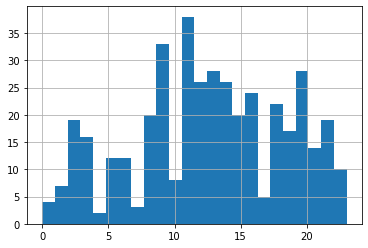

In [424]:
un_df3['SK_HORA_TRAFICO'].hist(bins=24)

<AxesSubplot:xlabel='SK_HORA_TRAFICO'>

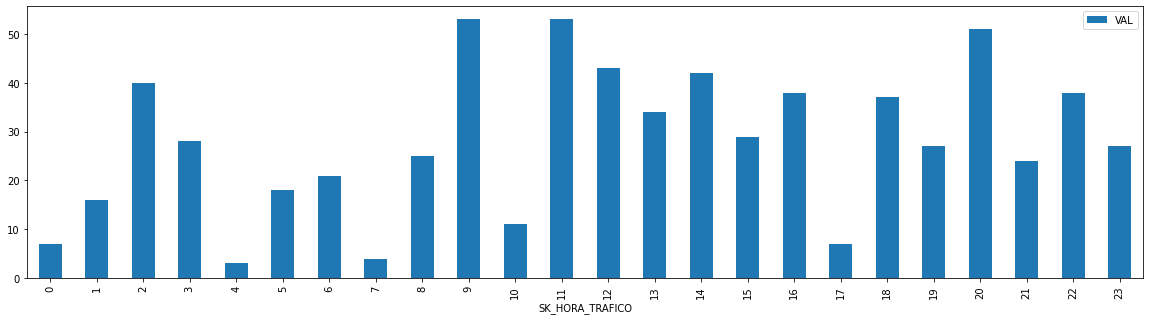

In [431]:
un_df3.groupby('SK_HORA_TRAFICO')[['VAL']].sum().plot(kind='bar',figsize=(20,5))

In [471]:
res_hora_evento=un_df3.groupby(['SK_HORA_TRAFICO','EVENTO'])[['VAL','EVENTO']].sum().reset_index()

In [472]:
#pd.pivot_table(res_hora_evento, index='SK_HORA_TRAFICO', columns='EVENTO', values='VAL', aggfunc=np.sum, fill_value=0).reset_index().reset_index()
res_hora_evento=pd.pivot_table(res_hora_evento, index='SK_HORA_TRAFICO', columns='EVENTO', values='VAL', aggfunc=np.sum, fill_value=0).reset_index()
res_hora_evento

EVENTO,SK_HORA_TRAFICO,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA
0,0,0,0,7,0,0
1,1,0,0,16,0,0
2,2,0,0,40,0,0
3,3,0,0,28,0,0
4,4,0,0,3,0,0
5,5,0,0,18,0,0
6,6,0,0,21,0,0
7,7,0,0,4,0,0
8,8,0,0,25,0,0
9,9,0,0,53,0,0


In [463]:
res_hora_evento.head(5)

EVENTO,SK_HORA_TRAFICO,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA
0,0,0,0,7,0,0
1,1,0,0,16,0,0
2,2,0,0,40,0,0
3,3,0,0,28,0,0
4,4,0,0,3,0,0


<AxesSubplot:xlabel='SK_HORA_TRAFICO'>

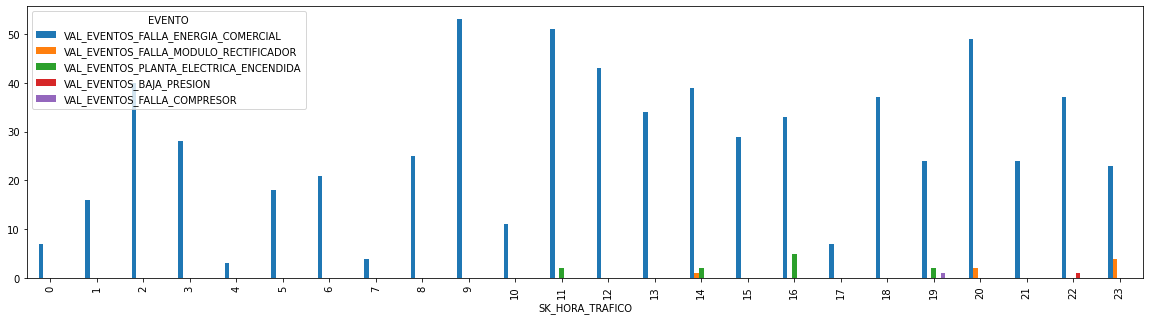

In [473]:
res_hora_evento.plot(kind='bar',figsize=(20,5), x='SK_HORA_TRAFICO', y=list_eventos)

<AxesSubplot:xlabel='SK_HORA_TRAFICO'>

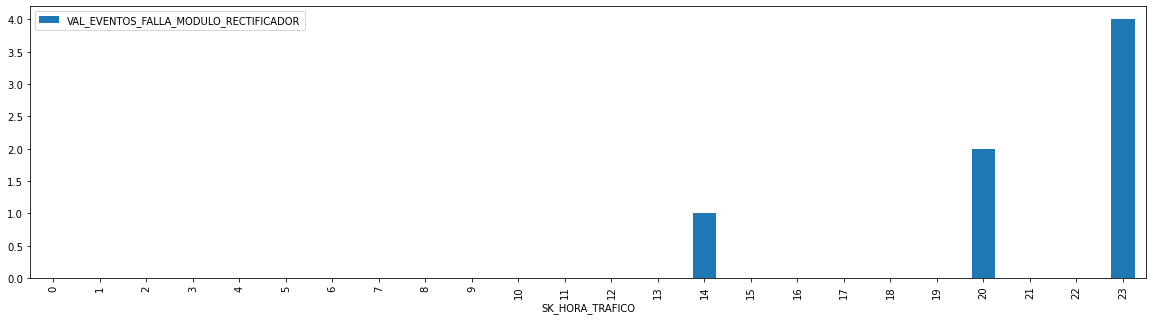

In [474]:
res_hora_evento.plot(kind='bar',figsize=(20,5), x='SK_HORA_TRAFICO', y='VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR')

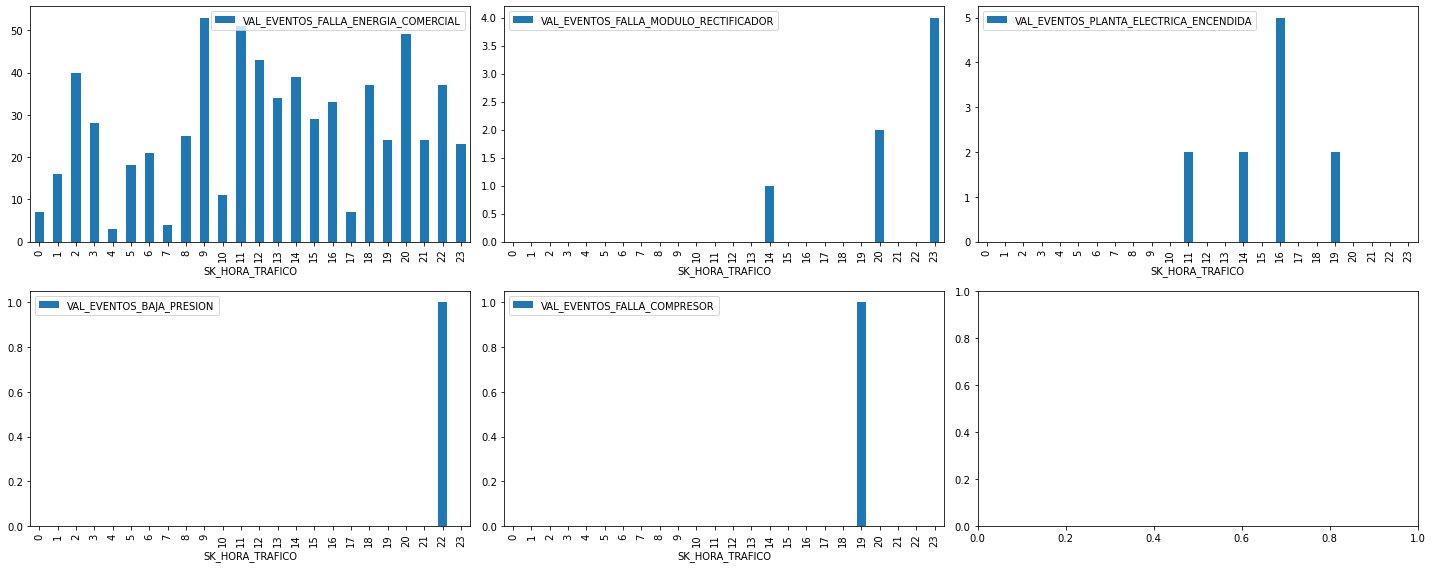

In [480]:
fig, axes = plt.subplots(2,3)
i=0
for evento in list_eventos:
    res_hora_evento.plot(kind='bar',figsize=(20,8), x='SK_HORA_TRAFICO', y=evento, ax=axes[i//3,i%3])
    i=i+1
fig.tight_layout()

## RECORTES

In [352]:
df_un_filt.head(3)

,COD_EQUIPO,EVENTO,VAL,DES_AMBITO,DES_SUBAMBITO,DES_MUNICIPIO,DES_DEPARTEMENTO,DES_MARCA,DES_MODELO,DES_TIPO,grupo
FEC_MEDICION,,,,,,,,,,,
2021-09-09,RTF_TERMOCOA_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Villavicencio,Meta,Emerson,ACU for DC,Rectificadores,Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-09-09,UPS_ACACIAS-CMA_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Castilla la Nueva,Meta,LIEBERT,GXT4-5000RT208,UPS,Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-09-09,UPS_EST1-CASTLL_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Castilla la Nueva,Meta,LIEBERT,GXT4-3000RT120,UPS,Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL


In [353]:
col_grupo=['EVENTO']
pre_event=prediccion(col_grupo)
pre_event[col_grupo]=pre_event['grupo'].str.split('|',expand=True)

In [354]:
col_grupo=['DES_DEPARTEMENTO','EVENTO']
pre_dep_event=prediccion(col_grupo)
pre_dep_event[col_grupo]=pre_dep_event['grupo'].str.split('|',expand=True)

In [355]:
col_grupo=['DES_DEPARTEMENTO','DES_MUNICIPIO','EVENTO']
pre_dep_mun_event=prediccion(col_grupo)
pre_dep_mun_event[col_grupo]=pre_dep_mun_event['grupo'].str.split('|',expand=True)

In [356]:
col_grupo=['DES_DEPARTEMENTO','DES_MUNICIPIO','DES_AMBITO','EVENTO']
pre_dep_mun_amb_event=prediccion(col_grupo)
pre_dep_mun_amb_event[col_grupo]=pre_dep_mun_amb_event['grupo'].str.split('|',expand=True)

In [360]:
col_grupo=['DES_DEPARTEMENTO','DES_MUNICIPIO','DES_TIPO','EVENTO']
pre_dep_mun_tipo_event=prediccion(col_grupo)
pre_dep_mun_tipo_event[col_grupo]=pre_dep_mun_tipo_event['grupo'].str.split('|',expand=True)

In [364]:
respuesta=pre_event.copy()
respuesta=respuesta.append(pre_dep_mun_tipo_event)
respuesta=respuesta.append(pre_dep_mun_amb_event)

In [367]:
respuesta.sample(10)

,pred,grupo,Metodo,EVENTO,DES_DEPARTEMENTO,DES_MUNICIPIO,DES_TIPO,DES_AMBITO
FECHA,,,,,,,,
2021-11-02,0.000,Meta|Puerto Gaitan|Proyectos|VAL_EVENTOS_FALLA...,HOLT,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,Meta,Puerto Gaitan,NaN,Proyectos
2021-10-27,0.009,Antioquia|Yondo|POWER SUPPLY|VAL_EVENTOS_FALLA...,HOLT,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,Antioquia,Yondo,POWER SUPPLY,NaN
2021-11-02,0.000,Santander|Piedecuesta|UPS|VAL_EVENTOS_FALLA_EN...,ARIMA,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,Santander,Piedecuesta,UPS,NaN
2021-11-03,0.319,Bolivar|Cantagallo|INFRABASICA|VAL_EVENTOS_FAL...,ARIMA,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,Bolivar,Cantagallo,NaN,INFRABASICA
2021-11-02,0.000,Huila|Aipe|COOLING|VAL_EVENTOS_FALLA_COMPRESOR,ARIMA,VAL_EVENTOS_FALLA_COMPRESOR,Huila,Aipe,COOLING,NaN
2021-10-27,0.000,Bolivar|Cartagena|UNKNOWN|VAL_EVENTOS_FALLA_EN...,ES_ajTend,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,Bolivar,Cartagena,UNKNOWN,NaN
2021-10-30,0.000,Bolivar|Cartagena|Proyectos|VAL_EVENTOS_FALLA_...,ARIMA,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,Bolivar,Cartagena,NaN,Proyectos
2021-10-28,0.000,Norte de Santander|Tibu|COOLING|VAL_EVENTOS_BA...,ES_ajTend,VAL_EVENTOS_BAJA_PRESION,Norte de Santander,Tibu,COOLING,NaN
2021-11-02,0.000,Putumayo|Orito|SDWAN-RED_B|VAL_EVENTOS_FALLA_C...,ARIMA,VAL_EVENTOS_FALLA_COMPRESOR,Putumayo,Orito,NaN,SDWAN-RED_B


In [348]:
pre_dep_event.sample(10)

,pred,grupo,Metodo,DES_DEPARTEMENTO,EVENTO
FECHA,,,,,
2021-10-28,0.000,Norte de Santander|VAL_EVENTOS_FALLA_MODULO_RE...,ES_ajTend,Norte de Santander,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR
2021-10-31,0.000,Casanare|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,HOLT,Casanare,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-10-29,0.000,Norte de Santander|VAL_EVENTOS_FALLA_MODULO_RE...,ES_ajTend,Norte de Santander,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR
2021-10-27,15.242,Putumayo|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,ETS,Putumayo,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-11-01,0.000,Huila|VAL_EVENTOS_FALLA_COMPRESOR,ARIMA,Huila,VAL_EVENTOS_FALLA_COMPRESOR
2021-10-28,0.000,Norte de Santander|VAL_EVENTOS_FALLA_ENERGIA_C...,ES,Norte de Santander,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-10-29,0.506,SIN DEPARTAMENTO|VAL_EVENTOS_FALLA_ENERGIA_COM...,ES_ajTend,SIN DEPARTAMENTO,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-10-31,0.001,Atlantico|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,ES,Atlantico,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-10-29,0.352,UNKNOWN|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,ETS,UNKNOWN,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL


In [311]:
df_un_filt.head()

,COD_EQUIPO,EVENTO,VAL,DES_AMBITO,DES_SUBAMBITO,DES_MUNICIPIO,DES_DEPARTEMENTO,DES_MARCA,DES_MODELO,DES_TIPO,grupo
FEC_MEDICION,,,,,,,,,,,
2021-09-09,RTF_TERMOCOA_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Villavicencio,Meta,Emerson,ACU for DC,Rectificadores,Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-09-09,UPS_ACACIAS-CMA_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Castilla la Nueva,Meta,LIEBERT,GXT4-5000RT208,UPS,Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-09-09,UPS_EST1-CASTLL_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Castilla la Nueva,Meta,LIEBERT,GXT4-3000RT120,UPS,Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-09-09,UPS_APY-GCENTRAL_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Villavicencio,Meta,Eaton,PW9130 3000VA-R,UPS,Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
2021-09-09,UPS_CHICHIMENE-LAB_VRO_01,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0,VRO,CABLEADO E INFRABASICA,Acacias,Meta,UNKNOWN,UNKNOWN,UNKNOWN,Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL


In [312]:
df_un_filt['grupo']=df_un_filt[col_grupo].agg('|'.join, axis=1)

In [313]:
listEventos=df_un_filt['grupo'].unique()

In [314]:
dfTotales=df_un_filt.groupby(['FEC_MEDICION','grupo']).sum()

In [315]:
dfTotales.reset_index(inplace=True)
dfTotales.set_index('FEC_MEDICION',inplace=True)

In [318]:
##completar Series
dfTotalesCom=pd.DataFrame()
i=0
for grupo in listEventos:
    aux=dfTotales[dfTotales['grupo']==grupo]
    aux=aux.reindex(ind, fill_value=0)
    aux['grupo']=grupo
    if i==0:
        dfTotalesCom=aux
    else:
        dfTotalesCom=dfTotalesCom.append(aux) 
    i=i+1

In [321]:
TablaTrain=dfTotalesCom[dfTotalesCom.index <= fechaTrain]
TablaTest=dfTotalesCom[dfTotalesCom.index >= fechaTest]

In [322]:
ind_test = pd.date_range(TablaTrain.index.max(), periods = diasHorizonte+1, freq ='D', name='FECHA')[1:]
ind_test

DatetimeIndex(['2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26'],
              dtype='datetime64[ns]', name='FECHA', freq='D')

In [325]:
final = pd.DataFrame()
finalErrores = {}
grouped =TablaTrain[['grupo','VAL']].groupby('grupo')
groupedTest =TablaTest[['grupo','VAL']].groupby('grupo')

In [278]:
metodos=['ARIMA','ES','HOLT','ES_ajTend','ETS']

In [326]:
i=0
for g in grouped.groups:
    print(g)
    #if i>numeroNodos*len(metodos):
    #    continue
    #if i/len(metodos)%10==0:
    #    print(i/len(metodos))    
    dicNodo={} 
    dicAuxMetodo={}
    group = grouped.get_group(g) 
    groupTest = groupedTest.get_group(g) 
    for metodo in metodos:
        if metodo== 'ARIMA':
            model=auto_arima(group['VAL'],trace=False)
            model.fit(group['VAL'])  
            forecast=pd.DataFrame(model.predict(n_periods = diasHorizonte),index=ind_test)
        elif metodo== 'ES':
            model = SimpleExpSmoothing(group['VAL'])
            model=model.fit(smoothing_level=.05)
            forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_test)
        elif metodo== 'HOLT':
            model = Holt(group['VAL']) 
            model = model.fit(optimized=True)
            forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_test)
        elif metodo== 'ES_ajTend':
            model = ExponentialSmoothing(group['VAL'],trend='add', seasonal=None, damped=True)
            model= model.fit()
            forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_test)        
        elif metodo== 'ETS':            
            model = ETSModel(group['VAL'].astype(float),seasonal_periods=15,error="add",trend="add",seasonal="add", damped_trend=True,)
            model = model.fit()
            start=len(group['VAL'])
            forecast = pd.DataFrame(model.get_prediction(start=start, end=start+diasHorizonte-1).summary_frame(alpha=0.05)['mean'],index=ind_test)
        forecast.columns = ['pred']  
        forecast['grupo']=g
        forecast['Metodo']=metodo        
        #print(forecast)
        #print(groupTest['VAL'])
        if i==0:
            final=forecast
        else:
            final=final.append(forecast)     
        # Errores
        ## Medicion varios errores, seleccionar el que mejor se ajuste
        RMSE=mean_squared_error(groupTest['VAL'],forecast['pred'], squared=False)
        MAPE=mean_absolute_percentage_error(groupTest['VAL'],forecast['pred'])    
        dicNodo[metodo]=RMSE  
        i=i+1
    finalErrores[g]=dicNodo    

Antioquia|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Antioquia|VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA
Atlantico|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Bolivar|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Casanare|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Cundinamarca|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Huila|VAL_EVENTOS_FALLA_COMPRESOR
Huila|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Huila|VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR
Meta|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Norte de Santander|VAL_EVENTOS_BAJA_PRESION
Norte de Santander|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Norte de Santander|VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR
Putumayo|VAL_EVENTOS_FALLA_COMPRESOR
Putumayo|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
SIN DEPARTAMENTO|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
Santander|VAL_EVENTOS_BAJA_PRESION
Santander|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
UNKNOWN|VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL


In [327]:
dfFinalErrores=pd.DataFrame.from_dict(finalErrores,orient='index')
minError=list(dfFinalErrores.min(axis=1).values)
#dfFinalErrores.head(10)

In [328]:
modeloSeleccionado=[np.nan]*len(dfFinalErrores)
i=0
for indx,row in dfFinalErrores.iterrows():
    auxRow=list(row.values)
    auxInd=auxRow.index(minError[i])
    modeloSeleccionado[i]=metodos[auxInd]
    #print(auxRow)
    i=i+1

In [329]:
dfFinalErrores['seleccion']=modeloSeleccionado
dfFinalErrores['errorMin']=minError

In [331]:
finalPrediccionesFuturas = pd.DataFrame()
groupedPred=dfTotalesCom[['grupo','VAL']].groupby('grupo')

In [332]:
i=0
for g in groupedPred.groups:       
    group = groupedPred.get_group(g)        
    mejorMetodo=dfFinalErrores.loc[g,'seleccion']   
    if mejorMetodo== 'ARIMA':
        model=auto_arima(group['VAL'],trace=False)
        model.fit(group['VAL'])  
        forecast=pd.DataFrame(model.predict(n_periods = diasHorizonte),index=ind_P)
    elif mejorMetodo== 'ES':
        model = SimpleExpSmoothing(group['VAL'])
        model=model.fit(smoothing_level=.5)
        forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_P)
    elif mejorMetodo== 'HOLT':
        model = Holt(group['VAL']) 
        model = model.fit(optimized=True)
        forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_P)
    elif mejorMetodo== 'ES_ajTend':
        model = ExponentialSmoothing(group['VAL'],trend='add', seasonal=None, damped=True)
        model= model.fit()
        forecast=pd.DataFrame(model.forecast(diasHorizonte),index=ind_P)
    elif mejorMetodo== 'ETS':
        model = ETSModel(group['VAL'].astype(float),seasonal_periods=15,error="add",trend="add",seasonal="add", damped_trend=True,)
        model= model.fit()
        start=len(group['VAL'])
        forecast = pd.DataFrame(model.get_prediction(start=start, end=start+diasHorizonte-1).summary_frame(alpha=0.05)['mean'],index=ind_P)       
    
    forecast.columns = ['pred'] 
    forecast['grupo']=g
    forecast['Metodo']=mejorMetodo

    if i==0:
        finalPrediccionesFuturas=forecast
    else:
        finalPrediccionesFuturas=finalPrediccionesFuturas.append(forecast) 
    i=i+1

In [333]:
#Reemplazar positivos por cero
finalPrediccionesFuturas['pred']=np.where(finalPrediccionesFuturas['pred']<0,0,finalPrediccionesFuturas['pred'])

In [ ]:
### Hasta aquí el método

In [334]:
finalPrediccionesFuturas.Metodo.value_counts()/8

ETS         5.000
ARIMA       4.000
ES          4.000
ES_ajTend   4.000
HOLT        2.000
Name: Metodo, dtype: float64

In [337]:
def visualNodo(nodo):
    print(finalErrores[nodo])
    dfNodo_real=dfTotalesCom[dfTotalesCom['grupo']==nodo][['VAL']]
    dfNodo=final[final['grupo']==nodo]
    dfNodo= pd.pivot_table(dfNodo.reset_index(), index='FECHA', columns='Metodo', values='pred')    
    dfNodo_real=dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left')
    dfPrediciciones=finalPrediccionesFuturas[finalPrediccionesFuturas['grupo']==nodo]
    metodoSel=dfPrediciciones['Metodo'].unique()[0]
    dfPrediciciones.rename(columns={'pred':'pred_'+metodoSel},inplace=True)   
    dfNodo_real.merge(dfPrediciciones[['pred_'+metodoSel]],left_index=True, right_index=True,how='outer').plot()

{'ARIMA': 4.5263566292046535, 'ES': 4.2096677396107305, 'HOLT': 4.660751639216641, 'ES_ajTend': 4.6150467853717, 'ETS': 5.398476217035918}
{'ARIMA': 2.0556244102404344, 'ES': 1.7941554238755715, 'HOLT': 2.795357830021935, 'ES_ajTend': 1.6862725243006187, 'ETS': 2.583318690686183}
{'ARIMA': 1.2820512820512826, 'ES': 1.14863430019289, 'HOLT': 0.7180861253393588, 'ES_ajTend': 1.2953843437793093, 'ETS': 0.5196323988710712}
{'ARIMA': 3.2272539367538737, 'ES': 2.9119635669714143, 'HOLT': 5.105112812984813, 'ES_ajTend': 4.957199141625822, 'ETS': 2.8512112324970387}
{'ARIMA': 4.3305299676864575, 'ES': 3.0862547342080546, 'HOLT': 4.0158921879116205, 'ES_ajTend': 3.600050376719783, 'ETS': 11.33196679798333}
{'ARIMA': 1.2747548783981961, 'ES': 1.153073220511583, 'HOLT': 1.139088329775776, 'ES_ajTend': 1.1222180558054216, 'ETS': 1.264049205364855}
{'ARIMA': 1.3076923076923082, 'ES': 1.2578258473610697, 'HOLT': 1.5933601565063376, 'ES_ajTend': 1.6167437561067783, 'ETS': 1.3061981610841553}
{'ARIMA'

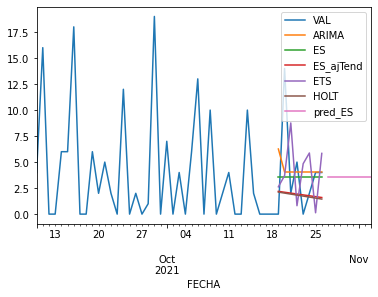

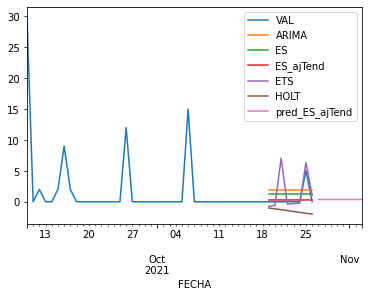

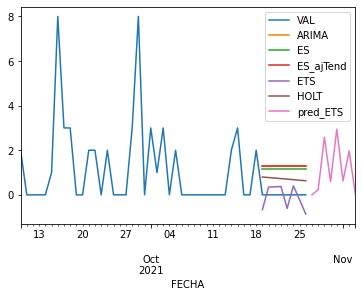

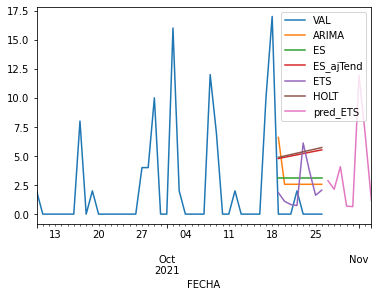

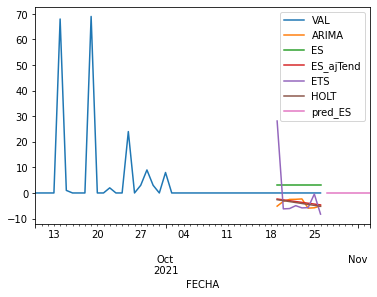

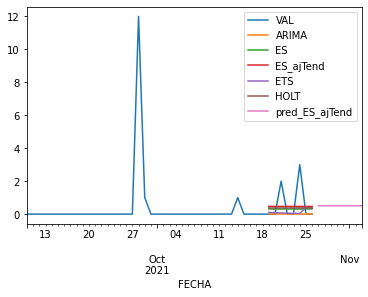

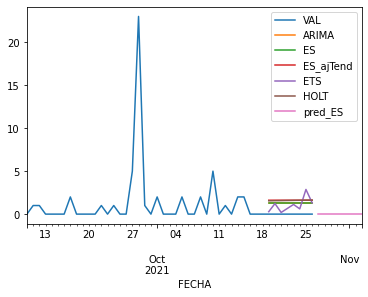

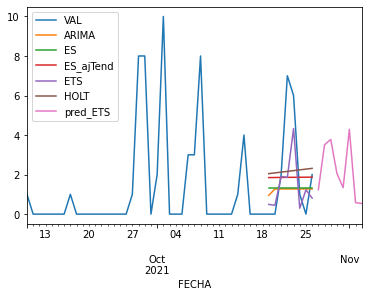

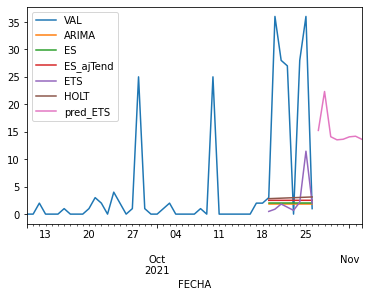

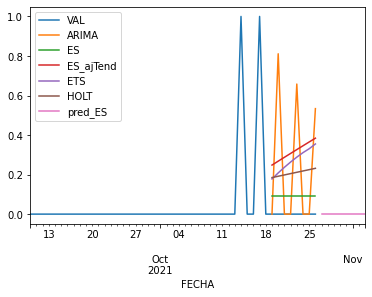

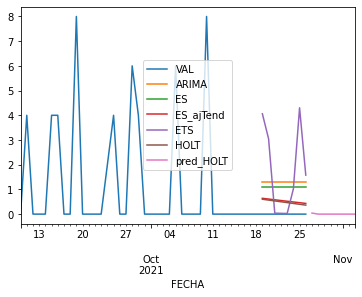

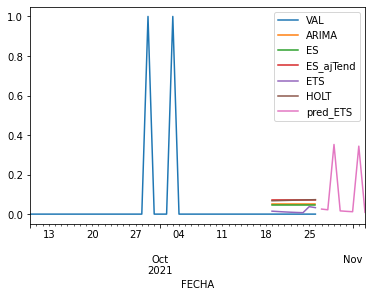

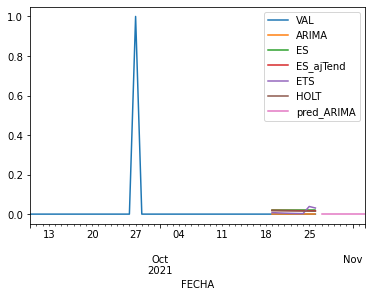

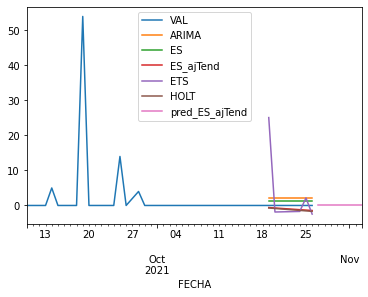

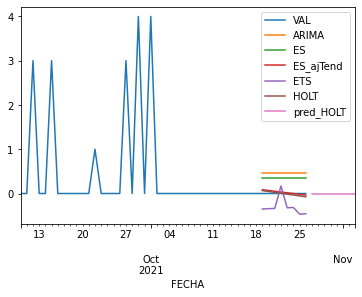

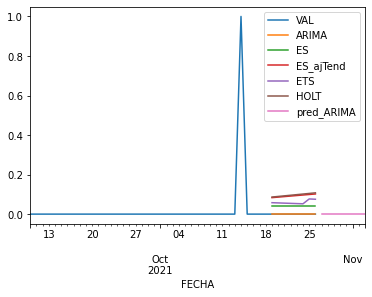

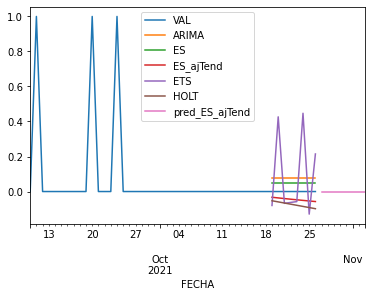

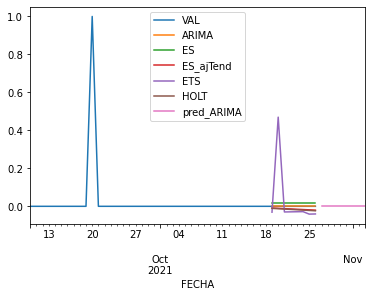

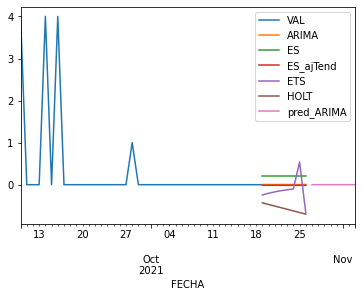

In [338]:
for evento in listEventos:
    visualNodo(evento)

## Recortes

## Totales

In [87]:
#df.head()

,DES_AMBITO,DES_SUBAMBITO,COD_EQUIPO,DES_MUNICIPIO,DES_DEPARTEMENTO,DES_MARCA,DES_MODELO,DES_TIPO,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,VAL_EVENTOS_ALTA_PRESION,VAL_EVENTOS_BAJA_PRESION,VAL_EVENTOS_FALLA_COMPRESOR
FEC_MEDICION,,,,,,,,,,,,,,
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-1_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-11_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-14_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-16_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0
2021-09-09,LTE,CONECTIVIDAD,R7705_PZ-SF-17_LTE_01,Aipe,Huila,Nokia,7705 SAR-Hm,ROUTER,0,0,0,0,0,0


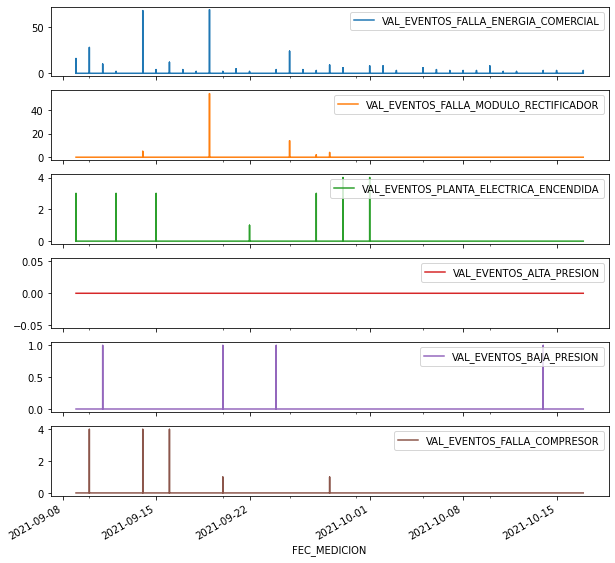

In [15]:
#df.plot(subplots=True,figsize=(10,10));

In [16]:
#Unpivot

In [17]:
#df_un= df.reset_index().melt(id_vars='FEC_MEDICION', var_name='EVENTO', value_name='VAL')

In [18]:
#df_un.head()

,FEC_MEDICION,EVENTO,VAL
0,2021-09-09,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
1,2021-09-09,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
2,2021-09-09,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
3,2021-09-09,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0
4,2021-09-09,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,0


In [ ]:
## inicio sol

In [19]:
dfTotales=df_un.groupby(['FEC_MEDICION','EVENTO']).sum()

In [20]:
dfTotales.reset_index(inplace=True)

In [68]:
dfTotales.head()

,EVENTO,VAL
FEC_MEDICION,,
2021-09-09,VAL_EVENTOS_BAJA_PRESION,0
2021-09-09,VAL_EVENTOS_FALLA_COMPRESOR,0
2021-09-09,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,24
2021-09-09,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,0
2021-09-09,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,3


In [22]:
dfTotales.set_index('FEC_MEDICION',inplace=True)

Timestamp('2021-10-17 00:00:00')

##  completar series dias dentro del rango

In [78]:
ind = pd.date_range(start=minFecha, end=maxFecha, freq ='D', name='FECHA')[1:]
ind

DatetimeIndex(['2021-09-10', '2021-09-11', '2021-09-12', '2021-09-13',
               '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17',
               '2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25',
               '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03',
               '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07',
               '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-16', '2021-10-17'],
              dtype='datetime64[ns]', name='FECHA', freq='D')

In [85]:
listEventos=dfTotales['EVENTO'].unique()

In [83]:
dfTotalesCom=pd.DataFrame()

In [86]:
i=0
for evento in listEventos:
    aux=dfTotales[dfTotales['EVENTO']==evento]
    aux=aux.reindex(ind, fill_value=0)
    aux['EVENTO']=evento
    if i==0:
        dfTotalesCom=aux
    else:
        dfTotalesCom=dfTotalesCom.append(aux) 
    i=i+1

In [88]:
dfTotalesCom.sample(10)

,EVENTO,VAL
FECHA,,
2021-09-20,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,3
2021-10-02,VAL_EVENTOS_FALLA_COMPRESOR,0
2021-09-12,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,0
2021-09-28,VAL_EVENTOS_BAJA_PRESION,0
2021-09-10,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,0
2021-09-29,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,0
2021-09-11,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,0
2021-10-13,VAL_EVENTOS_FALLA_COMPRESOR,0
2021-10-07,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,0


In [87]:
"""aux=dfTotales[dfTotales['EVENTO']=='VAL_EVENTOS_BAJA_PRESION']
aux=aux.reindex(ind, fill_value=0)
aux['EVENTO']='VAL_EVENTOS_BAJA_PRESION'
aux"""

"aux=dfTotales[dfTotales['EVENTO']=='VAL_EVENTOS_BAJA_PRESION']\naux=aux.reindex(ind, fill_value=0)\naux['EVENTO']='VAL_EVENTOS_BAJA_PRESION'\naux"

##  Separación Entrenamiento y testing

In [89]:
fechaMaxima=max(dfTotalesCom.index)
fechaMaxima

Timestamp('2021-10-17 00:00:00')

In [90]:
dfTotalesCom.index.unique()[-4]

Timestamp('2021-10-14 00:00:00')

In [110]:
fechaTrain=dfTotalesCom.index.unique()[-9]
fechaTest=dfTotalesCom.index.unique()[-8]

In [111]:
print (fechaTrain,fechaTest)

2021-10-09 00:00:00 2021-10-10 00:00:00


In [112]:
# quitar temporalmente VAL_EVENTOS_ALTA_PRESION
dfTotalesCom=dfTotalesCom[dfTotalesCom['EVENTO']!='VAL_EVENTOS_ALTA_PRESION']

In [113]:
TablaTrain=dfTotalesCom[dfTotalesCom.index <= fechaTrain]
TablaTest=dfTotalesCom[dfTotalesCom.index >= fechaTest]

### Indices Entrenamiento

In [114]:
ind = pd.date_range(TablaTrain.index.max(), periods = 9, freq ='D', name='FECHA')[1:]
ind

DatetimeIndex(['2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15', '2021-10-16', '2021-10-17'],
              dtype='datetime64[ns]', name='FECHA', freq='D')

In [115]:
dfTotalesCom.index.max()

Timestamp('2021-10-17 00:00:00')

In [116]:
len(dfTotalesCom)

190

In [117]:
dfTotalesCom.nunique()

EVENTO     5
VAL       27
dtype: int64

In [118]:
dfTotalesCom.isnull().sum()

EVENTO    0
VAL       0
dtype: int64

In [119]:
dfTotalesCom.head(3)

,EVENTO,VAL
FECHA,,
2021-09-10,VAL_EVENTOS_BAJA_PRESION,0
2021-09-11,VAL_EVENTOS_BAJA_PRESION,1
2021-09-12,VAL_EVENTOS_BAJA_PRESION,0


## Predicciones

In [171]:
numeroNodos=6
periodosPred=8

In [172]:
final = pd.DataFrame()
finalErrores = {}
grouped =TablaTrain[['EVENTO','VAL']].groupby('EVENTO')
groupedTest =TablaTest[['EVENTO','VAL']].groupby('EVENTO')
#groupedFinal=TablaFinal[['Nodo','Value','MARCACIONES']].groupby('Nodo')

In [173]:
p=groupedTest.get_group('VAL_EVENTOS_BAJA_PRESION')
p

,EVENTO,VAL
FECHA,,
2021-10-10,VAL_EVENTOS_BAJA_PRESION,0
2021-10-11,VAL_EVENTOS_BAJA_PRESION,0
2021-10-12,VAL_EVENTOS_BAJA_PRESION,0
2021-10-13,VAL_EVENTOS_BAJA_PRESION,0
2021-10-14,VAL_EVENTOS_BAJA_PRESION,1
2021-10-15,VAL_EVENTOS_BAJA_PRESION,0
2021-10-16,VAL_EVENTOS_BAJA_PRESION,0
2021-10-17,VAL_EVENTOS_BAJA_PRESION,0


In [174]:
idx = pd.date_range('10-09-2021', '09-10-2021')

In [175]:
metodos=['ARIMA','ES','HOLT','ES_ajTend']

In [176]:
## VAL ES

In [177]:
i=0
for g in grouped.groups:
    print(g)
    if i>numeroNodos*len(metodos):
        continue
    if i/len(metodos)%10==0:
        print(i/len(metodos))    
    dicNodo={} 
    dicAuxMetodo={}
    group = grouped.get_group(g) 
    groupTest = groupedTest.get_group(g) 
    for metodo in metodos:
        if metodo== 'ARIMA':
            model=auto_arima(group['VAL'],trace=False)
            model.fit(group['VAL'])  
            forecast=pd.DataFrame(model.predict(n_periods = periodosPred),index=ind)
        elif metodo== 'ES':
            model = SimpleExpSmoothing(group['VAL'])
            model=model.fit(smoothing_level=.05)
            forecast=pd.DataFrame(model.forecast(periodosPred),index=ind)
        elif metodo== 'HOLT':
            model = Holt(group['VAL']) 
            model = model.fit(optimized=True)
            forecast=pd.DataFrame(model.forecast(periodosPred),index=ind)
        elif metodo== 'ES_ajTend':
            model = ExponentialSmoothing(group['VAL'],trend='add', seasonal=None, damped=True)
            model= model.fit()
            forecast=pd.DataFrame(model.forecast(periodosPred),index=ind)        
        forecast.columns = ['pred']  
        forecast['EVENTO']=g
        forecast['Metodo']=metodo
        #print(forecast)
        #print(groupTest['VAL'])
        if i==0:
            final=forecast
        else:
            final=final.append(forecast)     
        # Errores
        ## Medicion varios errores, seleccionar el que mejor se ajuste
        RMSE=mean_squared_error(groupTest['VAL'],forecast['pred'], squared=False)
        MAPE=mean_absolute_percentage_error(groupTest['VAL'],forecast['pred'])    
        dicNodo[metodo]=RMSE  
        i=i+1
    finalErrores[g]=dicNodo
    

VAL_EVENTOS_BAJA_PRESION
0.0
VAL_EVENTOS_FALLA_COMPRESOR
VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL
VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR
VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA


* Velocidad de procesamiento:  200 Nodos x Minuto

In [178]:
final[final['Metodo']=='ARIMAX2'].head(10)

,pred,EVENTO,Metodo
FECHA,,,


In [179]:
final.isnull().sum()

pred      0
EVENTO    0
Metodo    0
dtype: int64

* No tiene nullos

## Selección mejor método por Nodo

In [180]:
metodos

['ARIMA', 'ES', 'HOLT', 'ES_ajTend']

In [181]:
dfFinalErrores=pd.DataFrame.from_dict(finalErrores,orient='index')
dfFinalErrores.head(10)

,ARIMA,ES,HOLT,ES_ajTend
VAL_EVENTOS_BAJA_PRESION,0.332,0.334,0.379,0.376
VAL_EVENTOS_FALLA_COMPRESOR,0.037,0.345,0.688,0.039
VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,17.440,16.853,13.962,14.120
VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,2.667,2.183,0.331,0.318
VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,0.600,0.566,0.457,0.469


In [182]:
minError=list(dfFinalErrores.min(axis=1).values)
minError[:10]

[0.33166247903554,
 0.03656116555171227,
 13.962224439732832,
 0.3175343456983414,
 0.4568911089474827]

In [183]:
modeloSeleccionado=[np.nan]*len(dfFinalErrores)
i=0
for indx,row in dfFinalErrores.iterrows():
    auxRow=list(row.values)
    auxInd=auxRow.index(minError[i])
    modeloSeleccionado[i]=metodos[auxInd]
    #print(auxRow)
    i=i+1

In [184]:
modeloSeleccionado[:10]

['ARIMA', 'ARIMA', 'HOLT', 'ES_ajTend', 'HOLT']

In [185]:
dfFinalErrores['seleccion']=modeloSeleccionado

In [186]:
dfFinalErrores['errorMin']=minError

In [187]:
dfFinalErrores.head(10)

,ARIMA,ES,HOLT,ES_ajTend,seleccion,errorMin
VAL_EVENTOS_BAJA_PRESION,0.332,0.334,0.379,0.376,ARIMA,0.332
VAL_EVENTOS_FALLA_COMPRESOR,0.037,0.345,0.688,0.039,ARIMA,0.037
VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,17.440,16.853,13.962,14.120,HOLT,13.962
VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,2.667,2.183,0.331,0.318,ES_ajTend,0.318
VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,0.600,0.566,0.457,0.469,HOLT,0.457


In [188]:
dfFinalErrores['seleccion'].value_counts()

ARIMA        2
HOLT         2
ES_ajTend    1
Name: seleccion, dtype: int64

## Predicción Final

In [189]:
#ind_P = pd.date_range(fechaMaxima, periods = 4, freq ='MS', name='FECHA')[1:]
ind_P= pd.date_range(maxFecha, periods = 9, freq ='D', name='FECHA')[1:]
ind_P

DatetimeIndex(['2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
               '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25'],
              dtype='datetime64[ns]', name='FECHA', freq='D')

In [190]:
finalPrediccionesFuturas = pd.DataFrame()
#groupedPred =dfTotalesCom[['Nodo','Value','MARCACIONES']].groupby('Nodo')
groupedPred=dfTotalesCom[['EVENTO','VAL']].groupby('EVENTO')

In [191]:
p=[1,2,3,4,5,6]
#np.tile(p,3)
p[-3:]
#p.reshape(-1,1)

[4, 5, 6]

In [192]:
i=0
for g in groupedPred.groups:
    if i>numeroNodos:
        continue
    if i%10==0:
        print(i)    
    group = groupedPred.get_group(g)        
    mejorMetodo=dfFinalErrores.loc[g,'seleccion']
    #print(mejorMetodo)
    #metodo=dicMetodos[g][mejorMetodo]
    #forecast=model.predict(group['Value'])
    if mejorMetodo== 'ARIMA':
        model=auto_arima(group['VAL'],trace=False)
        model.fit(group['VAL'])  
        forecast=pd.DataFrame(model.predict(n_periods = periodosPred),index=ind_P)
    elif mejorMetodo== 'ES':
        model = SimpleExpSmoothing(group['VAL'])
        model=model.fit(smoothing_level=.5)
        forecast=pd.DataFrame(model.forecast(periodosPred),index=ind_P)
    elif mejorMetodo== 'HOLT':
        model = Holt(group['VAL']) 
        model = model.fit(optimized=True)
        forecast=pd.DataFrame(model.forecast(periodosPred),index=ind_P)
    elif mejorMetodo== 'ES_ajTend':
        model = ExponentialSmoothing(group['VAL'],trend='add', seasonal=None, damped=True)
        model= model.fit()
        forecast=pd.DataFrame(model.forecast(periodosPred),index=ind_P)    
    
    forecast.columns = ['pred'] 
    forecast['EVENTO']=g
    forecast['Metodo']=mejorMetodo

    if i==0:
        finalPrediccionesFuturas=forecast
    else:
        finalPrediccionesFuturas=finalPrediccionesFuturas.append(forecast) 
    i=i+1
        

0


In [193]:
#Reemplazar positivos por cero
finalPrediccionesFuturas['pred']=np.where(finalPrediccionesFuturas['pred']>0,0,finalPrediccionesFuturas['pred'])

*  Velocidad de procesamiento 650 por minuto

In [194]:
finalPrediccionesFuturas.sample(10)

,pred,EVENTO,Metodo
FECHA,,,
2021-10-19,0.000,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,HOLT
2021-10-23,-0.004,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,HOLT
2021-10-21,0.000,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,HOLT
2021-10-24,-1.241,VAL_EVENTOS_FALLA_MODULO_RECTIFICADOR,ES_ajTend
2021-10-25,-0.609,VAL_EVENTOS_FALLA_COMPRESOR,ARIMA
2021-10-24,-0.023,VAL_EVENTOS_PLANTA_ELECTRICA_ENCENDIDA,HOLT
2021-10-23,0.000,VAL_EVENTOS_BAJA_PRESION,ARIMA
2021-10-18,0.000,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,HOLT
2021-10-19,0.000,VAL_EVENTOS_FALLA_ENERGIA_COMERCIAL,HOLT


In [195]:
resultadoFinal=finalPrediccionesFuturas.reset_index().merge(maestroNodo,left_on='Nodo',right_on='Nodo',how='left')
resultadoFinal.head(5)

NameError: name 'maestroNodo' is not defined

In [196]:
resultadoFinal.to_csv('resultadoPrediciones.csv')

NameError: name 'resultadoFinal' is not defined

## Visualizar Resultado Nodo

In [197]:
def visualNodo(nodo):
    print(finalErrores[nodo])
    dfNodo_real=dfTotalesCom[dfTotalesCom['EVENTO']==nodo][['VAL']]
    dfNodo=final[final['EVENTO']==nodo]
    dfNodo= pd.pivot_table(dfNodo.reset_index(), index='FECHA', columns='Metodo', values='pred')    
    dfNodo_real=dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left')
    dfPrediciciones=finalPrediccionesFuturas[finalPrediccionesFuturas['EVENTO']==nodo]
    metodoSel=dfPrediciciones['Metodo'].unique()[0]
    dfPrediciciones.rename(columns={'pred':'pred_'+metodoSel},inplace=True)   
    dfNodo_real.merge(dfPrediciciones[['pred_'+metodoSel]],left_index=True, right_index=True,how='outer').plot()

{'ARIMA': 0.33166247903554, 'ES': 0.33384263203367054, 'HOLT': 0.37903065785254325, 'ES_ajTend': 0.37573640180812906}
{'ARIMA': 0.03656116555171227, 'ES': 0.34549811510921097, 'HOLT': 0.6883043009677494, 'ES_ajTend': 0.03878140451148291}
{'ARIMA': 17.440024209972997, 'ES': 16.853222624618724, 'HOLT': 13.962224439732832, 'ES_ajTend': 14.1200784408942}
{'ARIMA': 2.666666666666666, 'ES': 2.18309321252447, 'HOLT': 0.33061470772806645, 'ES_ajTend': 0.3175343456983414}
{'ARIMA': 0.5999999999999999, 'ES': 0.5658590368701495, 'HOLT': 0.4568911089474827, 'ES_ajTend': 0.4687976823978161}


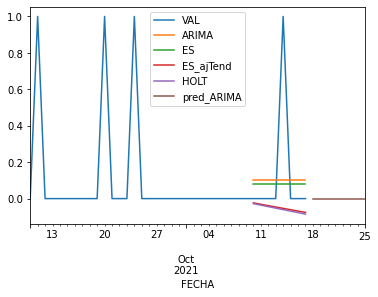

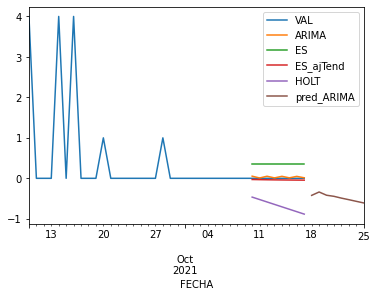

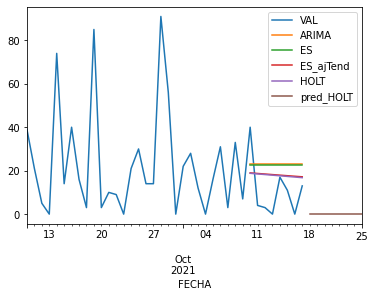

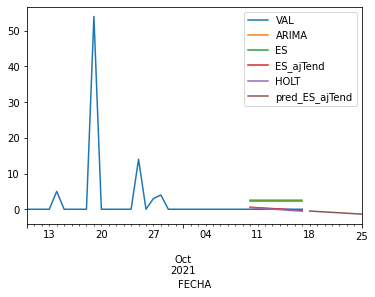

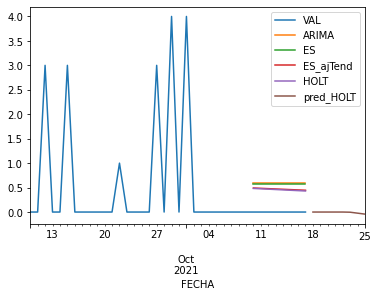

In [199]:
for evento in listEventos:
    visualNodo(evento)

{'ARIMA': 0.33166247903554, 'ES': 0.33384263203367054, 'HOLT': 0.37903065785254325, 'ES_ajTend': 0.37573640180812906}


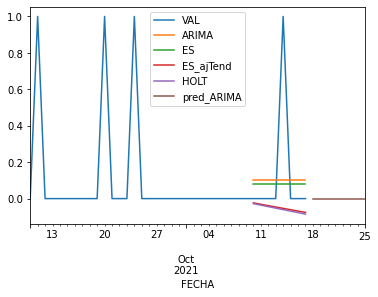

In [198]:
visualNodo('VAL_EVENTOS_BAJA_PRESION')

## Descripción del Resultado

In [ ]:
finalPrediccionesFuturas['Metodo'].value_counts()/3

In [ ]:
pieChart(finalPrediccionesFuturas['Metodo'])

In [ ]:
dfFinalErrores['errorMin'].hist()

In [ ]:
maxBin=dfFinalErrores['errorMin'].max()
bins=[0,1,2,5,10,20,maxBin]

In [ ]:
dfFinalErrores['binError']=pd.cut((dfFinalErrores['errorMin']),bins=np.sort(bins),right=True)

In [ ]:
dfFinalErrores.head(10)

In [ ]:
dfFinalErrores['binError'].value_counts()

In [ ]:
dfFinalErrores[['binError']].value_counts().sort_index(ascending=False).plot.barh()

#### Analisis preducciones futuras

In [ ]:
finalPrediccionesFuturas['pred'].hist()

In [ ]:
finalPrediccionesFuturas['pred'].describe()

In [ ]:
sns.violinplot(x=finalPrediccionesFuturas['pred']);

In [ ]:
minBin=finalPrediccionesFuturas['pred'].min()
bins=[minBin,-50,-30,-20,-10,-5,0,15]
finalPrediccionesFuturas['binPred']=pd.cut((finalPrediccionesFuturas['pred']),bins=np.sort(bins),right=True)
#finalPrediccionesFuturas['binPred']=pd.cut((finalPrediccionesFuturas['pred']),bins=5,right=True)

In [ ]:
finalPrediccionesFuturas['binPred'].value_counts()

In [ ]:
pieChart(finalPrediccionesFuturas['binPred'])

In [ ]:
dfGraf=finalPrediccionesFuturas.reset_index()[['FECHA','pred','Nodo']]

In [ ]:
dfGraf['FECHA']=dfGraf['FECHA'].astype(str)
dfGraf.head(10)

In [ ]:
sns.violinplot(x='FECHA', y='pred', data=dfGraf, inner="quart", linewidth=1)

In [ ]:
dfGraf=pd.pivot_table(dfGraf,index='Nodo',columns='FECHA',values='pred',aggfunc=np.sum)

In [ ]:
dfGraf.describe().T

### Resumen por nodo

In [ ]:
ResPred=finalPrediccionesFuturas.groupby('Nodo').sum()

In [ ]:
minBin=ResPred['pred'].min()
bins=[minBin-1,-150,-100,-50,-20,0,50]
ResPred['binPred']=pd.cut((ResPred['pred']),bins=np.sort(bins),right=True)
#ResPred['binPred']=pd.cut((ResPred['pred']),bins=5,right=True)

In [ ]:
ResPred['binPred'].value_counts()

In [ ]:
pieChart(ResPred['binPred'])

In [ ]:
ResPred.head(2)

#### Predicciones por distrito

In [ ]:
pt=ResPred.merge(maestroNodo,left_index=True,right_on='Nodo',how='left')
pt.head()

In [ ]:
pt=pd.pivot_table(pt,columns='binPred',index='E_distrito', fill_value=0)

In [ ]:
pt

In [ ]:
pt.sum(axis=1).sort_values()

##  Revisión casos atípicos
* Mayores errores en los metodos

In [ ]:
dfFinalErrores[dfFinalErrores['errorMin']>=20]

In [ ]:
for key, row in dfFinalErrores[dfFinalErrores['errorMin']>=20].iterrows():
    print(key)
    visualNodo(key)

* Churn más bajos

In [ ]:
finalPrediccionesFuturas[finalPrediccionesFuturas['pred']<=-50]

In [ ]:
for key, row in ResPred[ResPred['pred']<=-100].iterrows():
    print(key)
    visualNodo(key)

### Validacion

In [206]:
atest=[3,np.nan,6]
atest=[3]
apred=[4, 2, 5]

In [207]:
atest

[3]

In [208]:
RMSE=mean_squared_error(atest,apred, squared=False)
MAPE=mean_absolute_percentage_error(atest,apred)

ValueError: Found input variables with inconsistent numbers of samples: [1, 3]